In [0]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [0]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df_ori = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [0]:
pd.set_option('display.max_columns', 85)
df_ori.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA

In [0]:
df_ori.shape

(1460, 81)

In [0]:
# summary stats for numeric variables
df_ori.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
# summary stats for non-numeric variables
df_ori.describe(include = 'O')

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


# Continuous variables

In [0]:
# get column names for the continuous variables
col_num = df_ori.select_dtypes(['int64', 'float64']).columns.tolist()

df_ori.select_dtypes(['int64', 'float64'])

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,firstflrsf,secondflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garageyrblt,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


We notice a lot of 0's in the columns.

In [0]:
# count the number of 0's in each col_num
for i in col_num:
  print(i, '\t', df_ori[i][df_ori[i] == 0].count())

id 	 0
mssubclass 	 0
lotfrontage 	 0
lotarea 	 0
overallqual 	 0
overallcond 	 0
yearbuilt 	 0
yearremodadd 	 0
masvnrarea 	 861
bsmtfinsf1 	 467
bsmtfinsf2 	 1293
bsmtunfsf 	 118
totalbsmtsf 	 37
firstflrsf 	 0
secondflrsf 	 829
lowqualfinsf 	 1434
grlivarea 	 0
bsmtfullbath 	 856
bsmthalfbath 	 1378
fullbath 	 9
halfbath 	 913
bedroomabvgr 	 6
kitchenabvgr 	 1
totrmsabvgrd 	 0
fireplaces 	 690
garageyrblt 	 0
garagecars 	 81
garagearea 	 81
wooddecksf 	 761
openporchsf 	 656
enclosedporch 	 1252
threessnporch 	 1436
screenporch 	 1344
poolarea 	 1453
miscval 	 1408
mosold 	 0
yrsold 	 0
saleprice 	 0


In [0]:
# get the % of 0's in each col_num
for i in col_num:
  print(i, '\t', round(df_ori[i][df_ori[i] == 0].count()/len(df_ori)*100, 1))

id 	 0.0
mssubclass 	 0.0
lotfrontage 	 0.0
lotarea 	 0.0
overallqual 	 0.0
overallcond 	 0.0
yearbuilt 	 0.0
yearremodadd 	 0.0
masvnrarea 	 59.0
bsmtfinsf1 	 32.0
bsmtfinsf2 	 88.6
bsmtunfsf 	 8.1
totalbsmtsf 	 2.5
firstflrsf 	 0.0
secondflrsf 	 56.8
lowqualfinsf 	 98.2
grlivarea 	 0.0
bsmtfullbath 	 58.6
bsmthalfbath 	 94.4
fullbath 	 0.6
halfbath 	 62.5
bedroomabvgr 	 0.4
kitchenabvgr 	 0.1
totrmsabvgrd 	 0.0
fireplaces 	 47.3
garageyrblt 	 0.0
garagecars 	 5.5
garagearea 	 5.5
wooddecksf 	 52.1
openporchsf 	 44.9
enclosedporch 	 85.8
threessnporch 	 98.4
screenporch 	 92.1
poolarea 	 99.5
miscval 	 96.4
mosold 	 0.0
yrsold 	 0.0
saleprice 	 0.0


We will remove features with >45% zeros.

In [0]:
df = df_ori.copy()

# get a list of all numeric column names
col_num_fea = col_num

unwanted_fea = ['masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'secondflrsf', 'lowqualfinsf', 'bsmtfullbath', 'bsmthalfbath', 
                'halfbath', 'fireplaces', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 
                'poolarea', 'miscval']
col_num_fea = [i for i in col_num_fea if i not in unwanted_fea]

In [0]:
# # print all values that cannot be converted to float
# for col in col_num:
#     for value in df_ori[col]:
#         try:
#             float(value)
#         except:
#             print("These are the problematic values for the variable: {}".format(col))
#             print(value)

## Missing values

In [0]:
# get the number of missing values
df[col_num_fea].isnull().sum().sort_values(ascending=False)

lotfrontage     259
garageyrblt      81
saleprice         0
totalbsmtsf       0
mssubclass        0
lotarea           0
overallqual       0
overallcond       0
yearbuilt         0
yearremodadd      0
bsmtunfsf         0
firstflrsf        0
yrsold            0
grlivarea         0
fullbath          0
bedroomabvgr      0
kitchenabvgr      0
totrmsabvgrd      0
garagecars        0
garagearea        0
mosold            0
id                0
dtype: int64

In [0]:
# get the % of missing values
round(df[col_num_fea].isnull().sum()/len(df[col_num_fea])*100, 1).sort_values(ascending=False).head()

lotfrontage    17.7
garageyrblt     5.5
saleprice       0.0
totalbsmtsf     0.0
mssubclass      0.0
dtype: float64

Two continuous variables have missing values: 'lotfrontage', 'garageyrblt'.

In [0]:
# print the unique values of 'lotfrontage', 'garageyrblt'
col_num_incomplete = ['lotfrontage', 'garageyrblt']

for i in col_num_incomplete:
  print(i, df[i].unique())

lotfrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
garageyrblt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 1991. 1970. 1967. 1958. 1930. 2002. 1968. 2007. 2008.
 1957. 1920. 1966. 1959. 1995. 1954. 1953.   nan 1983. 1977. 1997. 1985.
 1963. 1981. 1964. 1999. 1935. 1990. 1945. 1987. 1989. 1915. 1956. 1948.
 1974. 2009. 1950. 1961. 1921. 1900. 1979. 1951. 1969. 1936. 1975. 1971.
 1923. 1984. 1926. 1955. 1986. 1988. 1916. 1932

It seems that 'lotfrontage' & 'garageyrblt' are discrete variables. We will fill in the missing values of these variables with the median values of the neighborhood where the house is located.

In [0]:
# fill in missing values
neighborhood = df.neighborhood.unique()

for i in col_num_incomplete:
  for j in neighborhood:
      df[i][df.neighborhood == j] = df[i][df.neighborhood == j].fillna(df[i][df.neighborhood == j].median())

In [0]:
df[col_num_fea].isnull().sum().sort_values(ascending=False).head()

saleprice      0
yrsold         0
mssubclass     0
lotfrontage    0
lotarea        0
dtype: int64

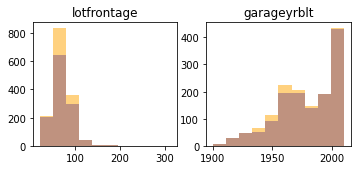

In [0]:
# plot histogram with and without filling in missing values
fig = plt.figure(figsize = (15,5))
for i, col in enumerate(col_num_incomplete):
  plt.subplot(len(col_num_incomplete), 5, i+1)
  plt.hist(df_ori[col], alpha = 0.5, color = 'blue')
  plt.hist(df[col], alpha = 0.5, color = 'orange')
  plt.title(col)

plt.show()

The fillna method seems reasonable. It seems that the additional filled-in missing values does not alter the original distribution of the variables significantly.

## Univariate Analysis

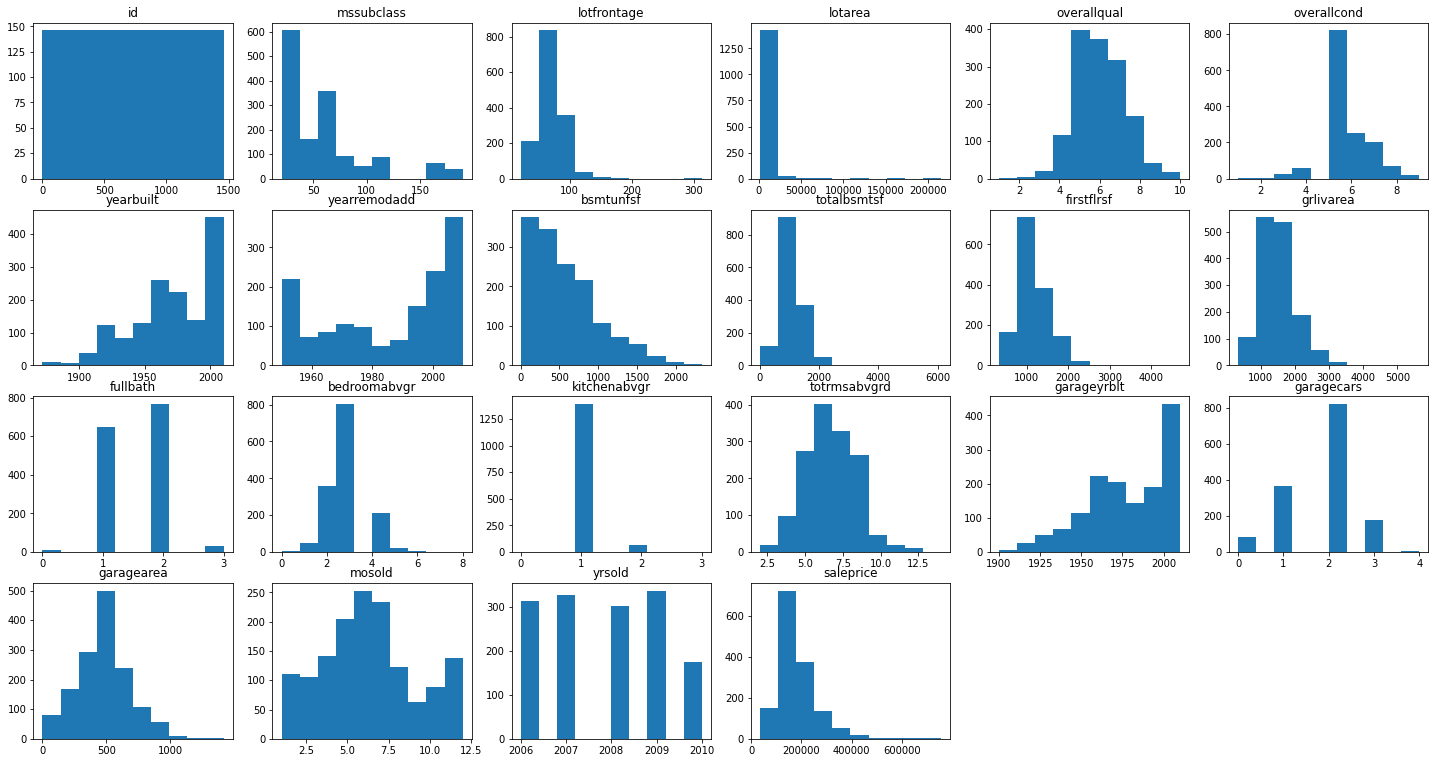

In [0]:
# plot histogram of continuous variables
fig = plt.figure(figsize = (25,75))

for i, col in enumerate(col_num_fea):
  plt.subplot(len(col_num_fea), 6, i+1)
  plt.hist(df[col])
  plt.title(col)

plt.show()

We can see that 'id' shows a uniform distribution. We will remove it from the feature selection in our model.

In [0]:
unwanted_fea = ['id']
col_num_fea = [i for i in col_num_fea if i not in unwanted_fea]

In [0]:
# for i in col_num_fea:
#   print(i, '\t', df[i].nunique())

## Handling outliers

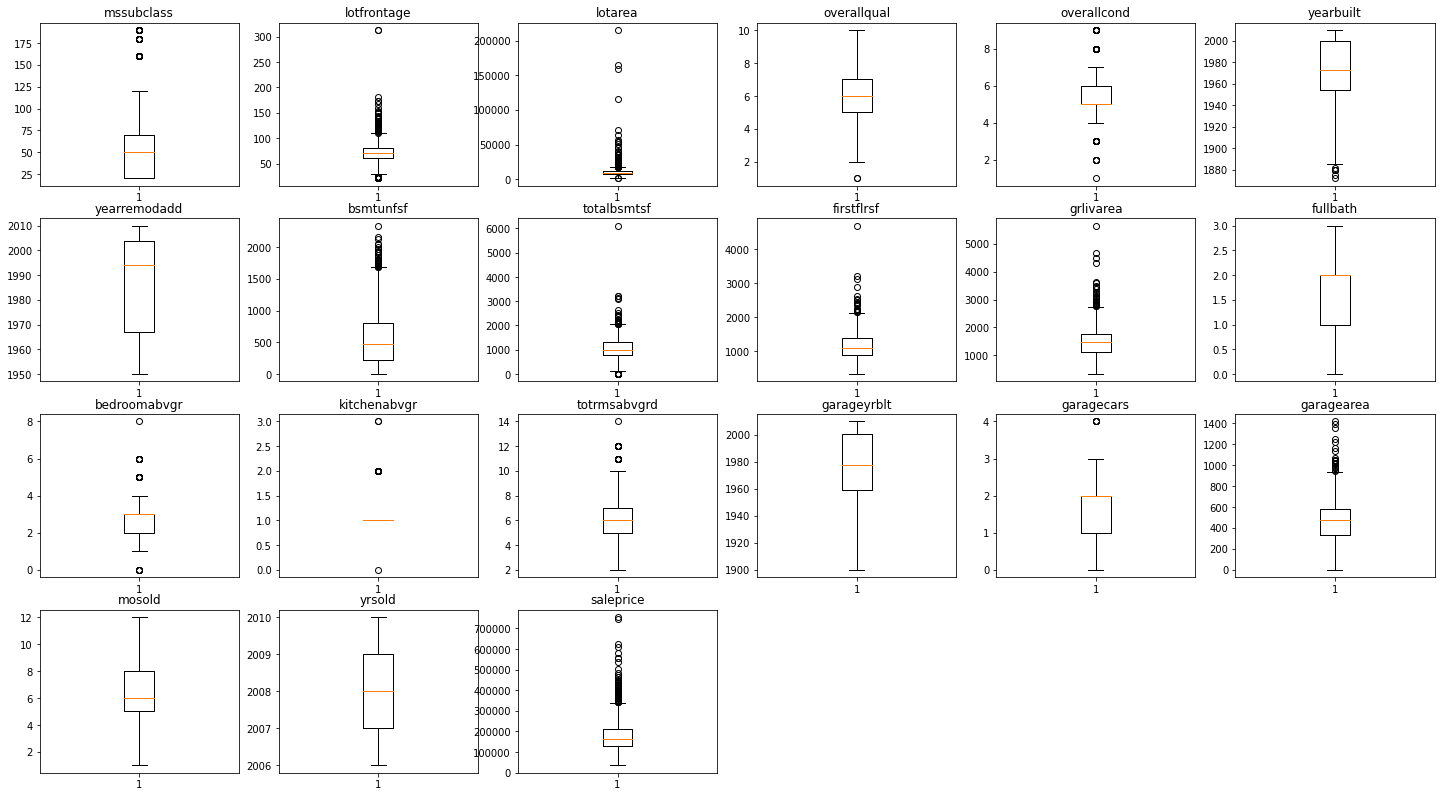

In [0]:
# plot boxplot
fig = plt.figure(figsize = (25,75))

for i, col in enumerate(col_num_fea):
  plt.subplot(len(col_num_fea), 6, i+1)
  plt.boxplot(df[col])
  plt.title(col)

plt.show()

From the above boxplots, it is clear that many variables have outliers. We create a generalized function to deal with the outliers using winsorization, log-transform, square root, inverse, and Box-Cox transform.

In [0]:
from scipy.stats import boxcox, shapiro, jarque_bera, normaltest
from scipy.stats.mstats import winsorize

def transform(col):
  winsorize_df_0025 = winsorize(col, limits = [0.025, 0.025])
  winsorize_df_005 = winsorize(col, limits = [0.05, 0.05])
  winsorize_df_01 = winsorize(col, limits = [0.1, 0.1])
  log10_df = np.log10(col[col > 0])
  # exp_df = np.exp(col[col > 0])
  sqrt_df = np.sqrt(col)
  inverse_df = np.divide(1,col[col > 0])
  boxcox_df, _ = boxcox(col[col > 0])

  # test
  transformed_df_dict = {'ori': col,
                         'winsorize_df_0025': winsorize_df_0025, 
                         'winsorize_df_005': winsorize_df_005, 
                         'winsorize_df_01': winsorize_df_01,
                        #  'exp_df': exp_df, 
                         'log10_df': log10_df, 
                         'sqrt_df': sqrt_df, 
                         'inverse_df': inverse_df, 
                         'boxcox_df': boxcox_df}


  fig, axs = plt.subplots(1, 8, figsize=(18, 2))
  axs = axs.ravel()

  for idx, i in enumerate(transformed_df_dict):
    shapiro_df = shapiro(transformed_df_dict[i])
    jarque_bera_df = jarque_bera(transformed_df_dict[i])
    normal_df = normaltest(transformed_df_dict[i])

    print('p-values for {}:'.format(i), round(shapiro_df[1],2), round(jarque_bera_df[1],2), round(normal_df[1],2))

    axs[idx].hist(transformed_df_dict[i])
    axs[idx].set_title(i)

  plt.show()

mssubclass
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


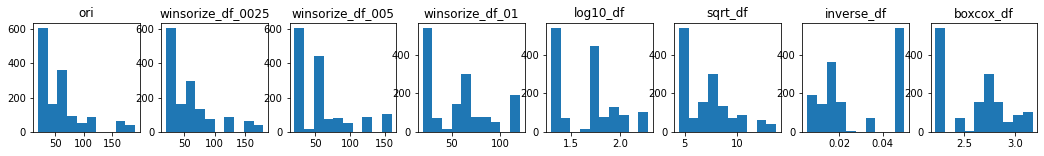


lotfrontage
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.14 0.09
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


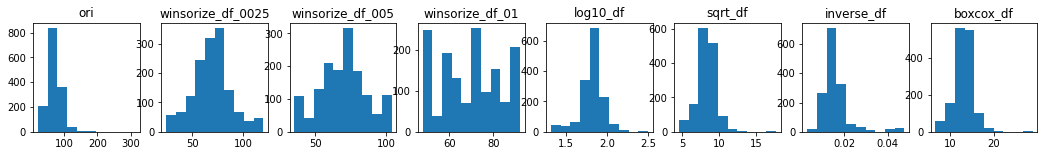


lotarea
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


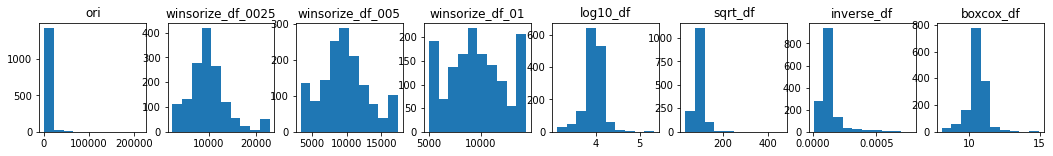


overallqual
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.14 0.16


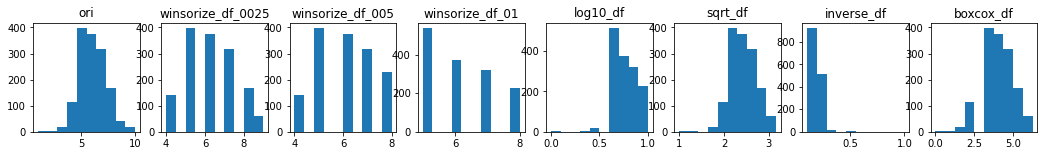


overallcond
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


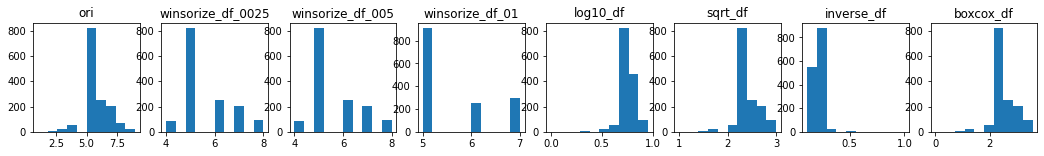


yearbuilt
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 1.0 0.0 0.0


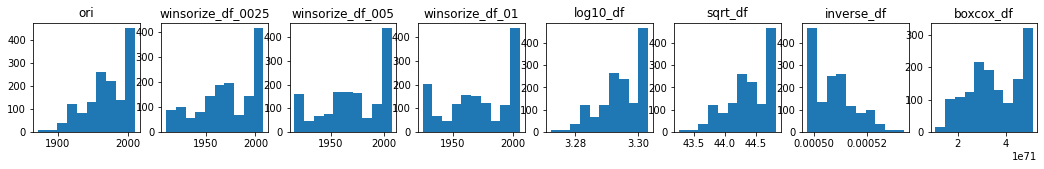


yearremodadd
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 1.0 nan nan


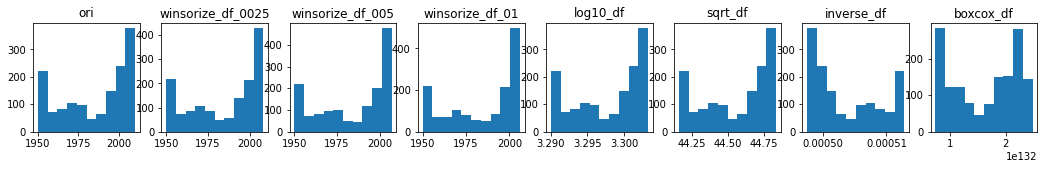


bsmtunfsf
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


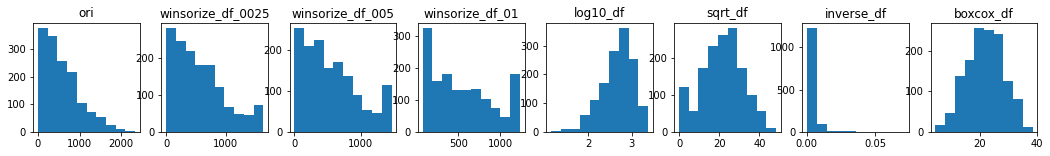


totalbsmtsf
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.02 0.03
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


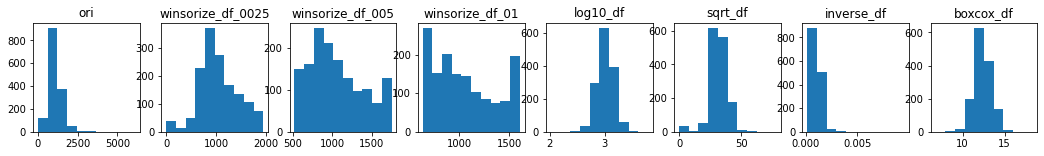


firstflrsf
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.24 0.24
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.59 0.56


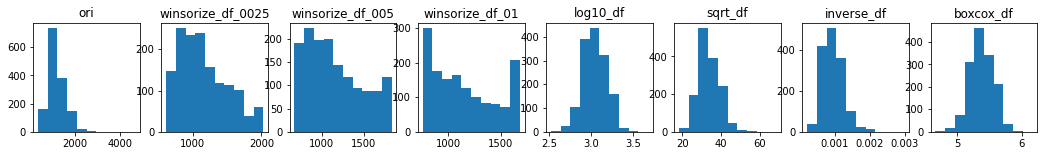


grlivarea
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.1 0.13
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.09 0.13


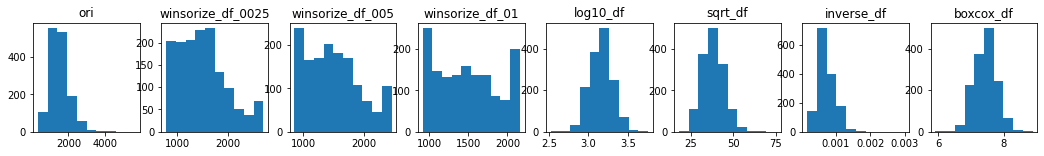


fullbath
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


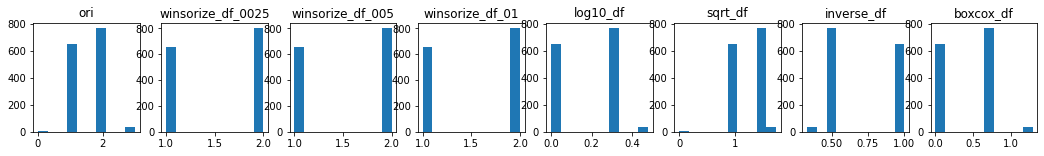


bedroomabvgr
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


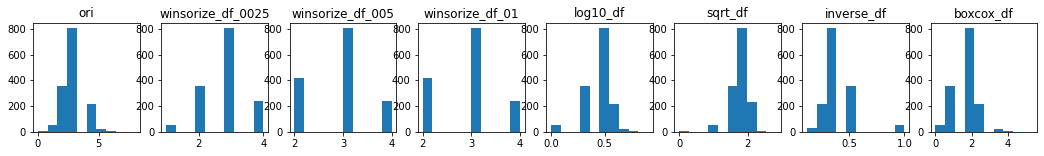


kitchenabvgr
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 1.0 nan 0.0
p-values for winsorize_df_01: 1.0 nan 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


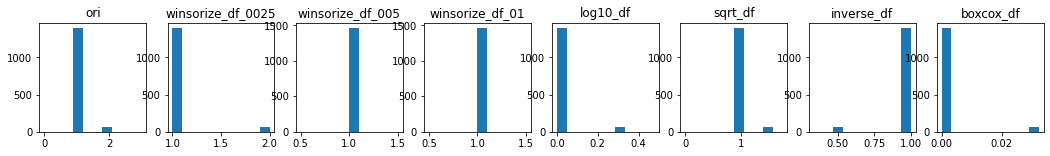


totrmsabvgrd
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.02 0.04


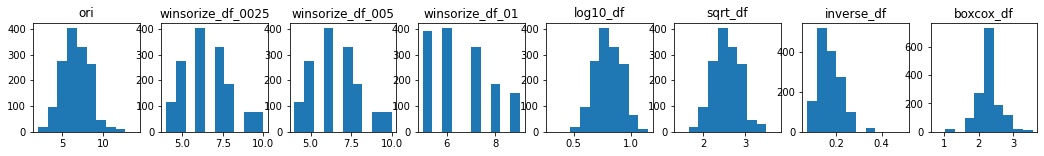


garageyrblt
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 1.0 nan nan


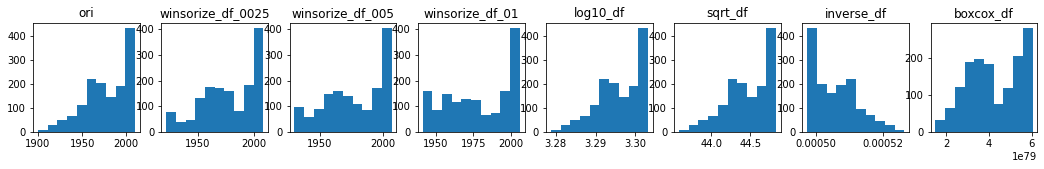


garagecars
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


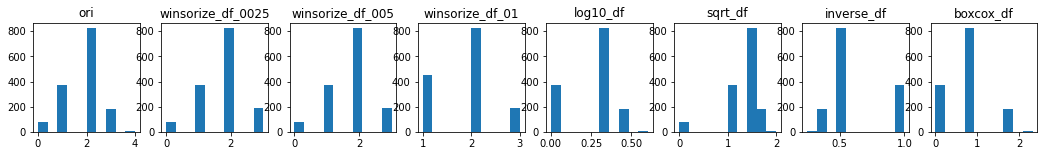


garagearea
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.14 0.13
p-values for winsorize_df_005: 0.0 0.01 0.01
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.31 0.27


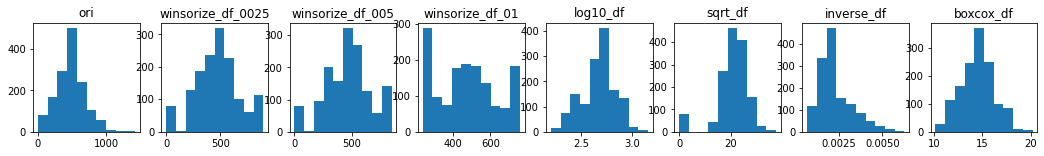


mosold
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.03 0.01


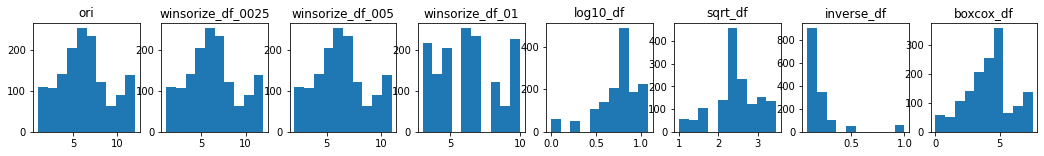


yrsold
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 1.0 0.0 0.0


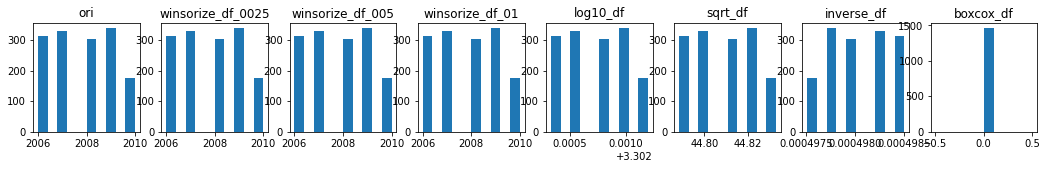


saleprice
p-values for ori: 0.0 0.0 0.0
p-values for winsorize_df_0025: 0.0 0.0 0.0
p-values for winsorize_df_005: 0.0 0.0 0.0
p-values for winsorize_df_01: 0.0 0.0 0.0
p-values for log10_df: 0.0 0.0 0.0
p-values for sqrt_df: 0.0 0.0 0.0
p-values for inverse_df: 0.0 0.0 0.0
p-values for boxcox_df: 0.0 0.0 0.0


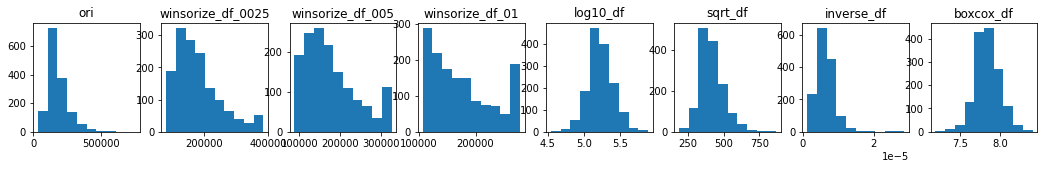

In [0]:
for col in col_num_fea:
  print(col)
  transform(df[col])
  print('')

In most cases, the p-values for Shapiro-Wilk, Jarque-Bera, and normal test are <0.05. This means that the distributions are not normally distributed. In this case, we will choose the distribution that looks most like a normal distribution to decide on the appropriate transformations (priority will be given to winsorization as this involves the least manipulation of the original values). If an appropriate transformation is not found, we will leave the variables in their original form.

In [0]:
cols_win0025 = ['totalbsmtsf', 'garagearea']
cols_win005 = ['lotfrontage', 'lotarea']
cols_log10 = ['firstflrsf', 'grlivarea']
cols_boxcox = ['bsmtunfsf']

# feature creation
for i in cols_win0025:
  df['{}_transformed'.format(i)] = winsorize(df[i], limits = [0.025, 0.025])

for i in cols_win005:
  df['{}_transformed'.format(i)] = winsorize(df[i], limits = [0.05, 0.05])

for i in cols_log10:
  df['{}_transformed'.format(i)] = np.log10(df[i])

for i in cols_boxcox:
  df['{}_transformed'.format(i)] = df[i]
  df['{}_transformed'.format(i)][df['{}_transformed'.format(i)]>0] = boxcox(df['{}_transformed'.format(i)][df['{}_transformed'.format(i)]>0])[0]

col_num_fea = col_num_fea + ['totalbsmtsf_transformed', 'garagearea_transformed', 'lotfrontage_transformed', 'lotarea_transformed', 'firstflrsf_transformed', 'grlivarea_transformed', 'bsmtunfsf_transformed']

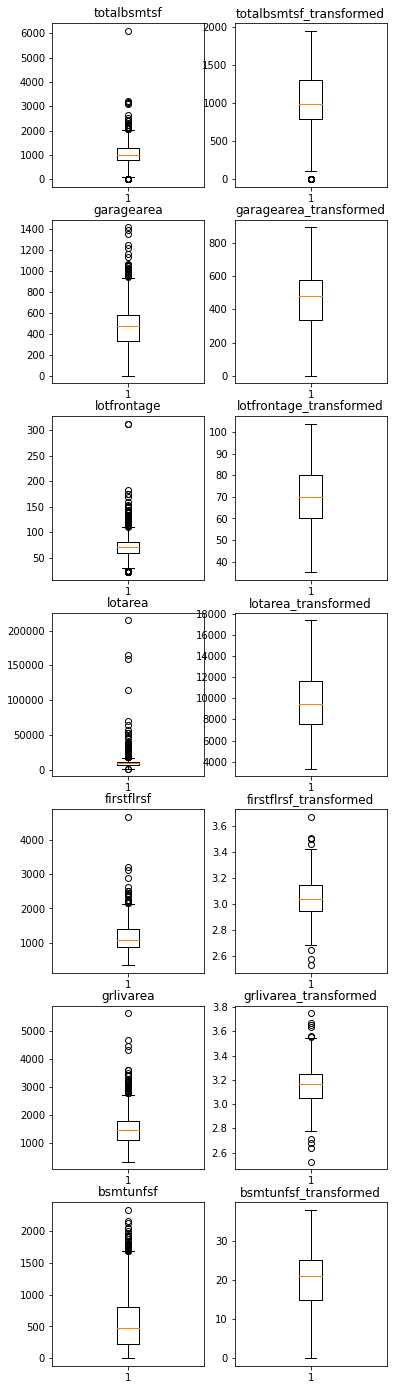

In [0]:
# plot boxplot of original vs transformed features
fig = plt.figure(figsize = (6,50))

ori_vs_transformed = ['totalbsmtsf', 'totalbsmtsf_transformed', 'garagearea', 'garagearea_transformed',
                         'lotfrontage', 'lotfrontage_transformed','lotarea', 'lotarea_transformed',
                         'firstflrsf', 'firstflrsf_transformed','grlivarea', 'grlivarea_transformed',
                         'bsmtunfsf', 'bsmtunfsf_transformed']

for i, col in enumerate(ori_vs_transformed):
  plt.subplot(len(ori_vs_transformed), 2, i+1)
  plt.boxplot(df[col])
  plt.title(col)

plt.show()

## Bivariate Analysis

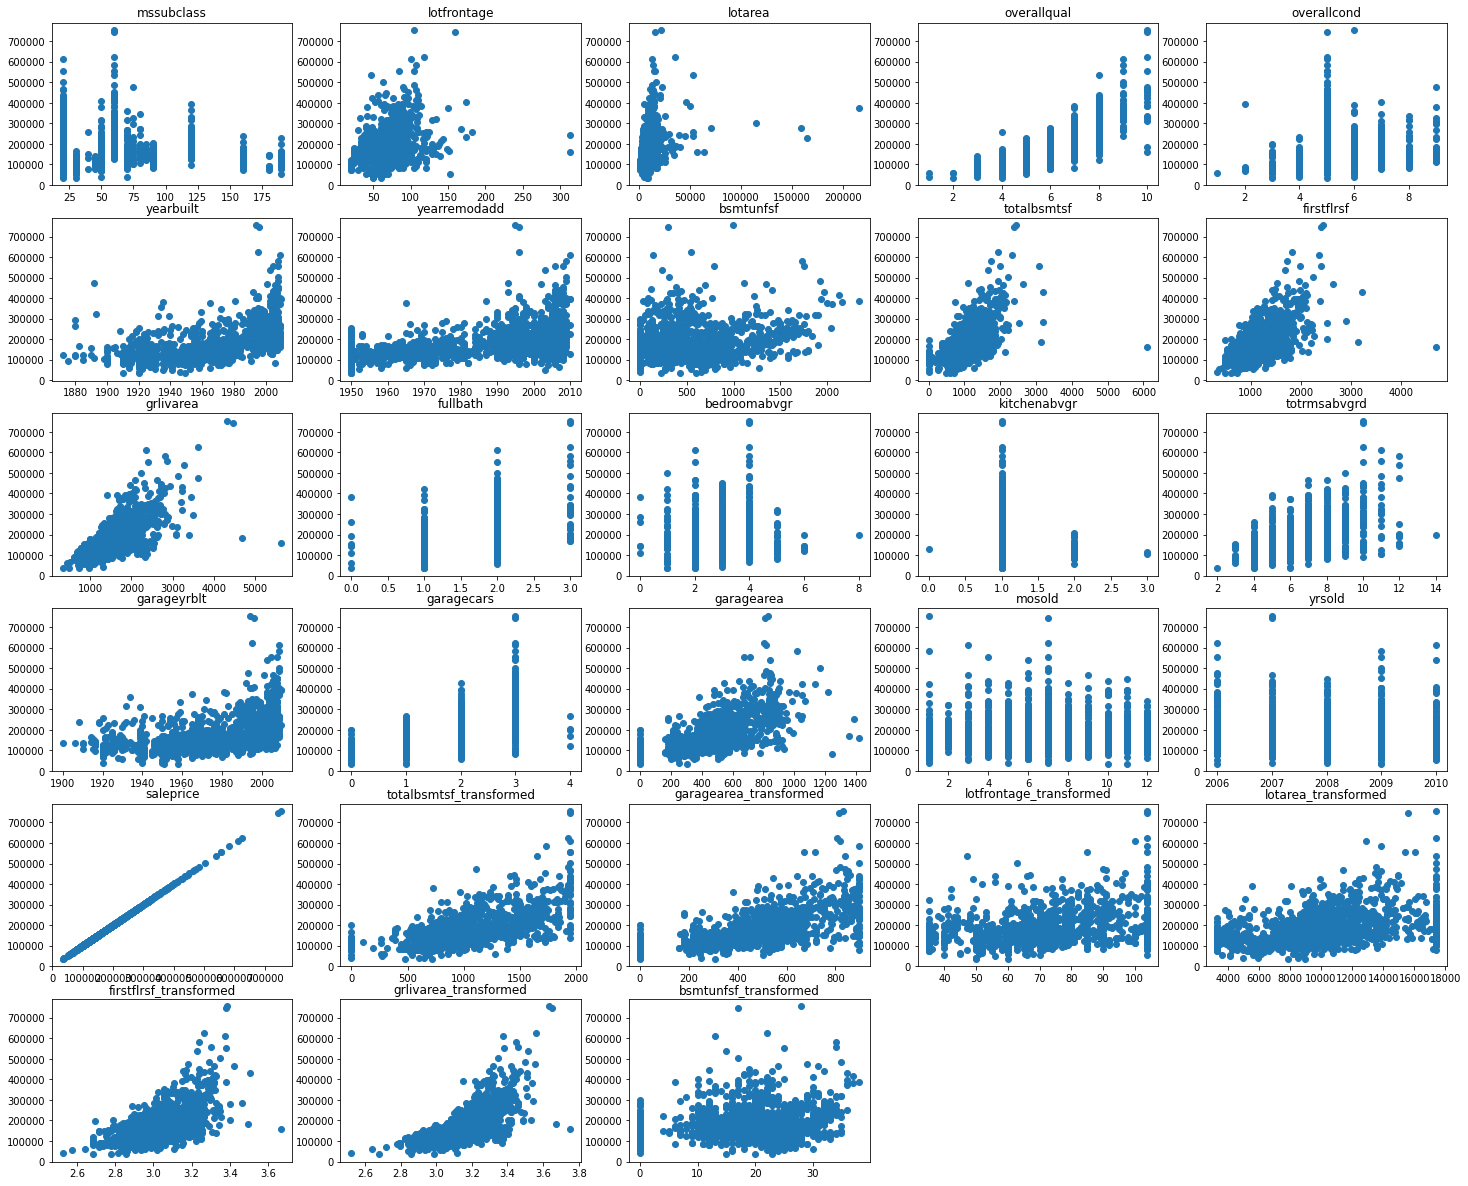

In [0]:
# plot features against target variable (saleprice)
fig = plt.figure(figsize = (25,100))

for i, col in enumerate(col_num_fea):
  plt.subplot(len(col_num_fea), 5, i+1)
  plt.scatter(df[col], df['saleprice'])
  plt.title(col)

plt.show()

In [0]:
df[col_num_fea].corr()

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,bsmtunfsf,totalbsmtsf,firstflrsf,grlivarea,fullbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,garageyrblt,garagecars,garagearea,mosold,yrsold,saleprice,totalbsmtsf_transformed,garagearea_transformed,lotfrontage_transformed,lotarea_transformed,firstflrsf_transformed,grlivarea_transformed,bsmtunfsf_transformed
mssubclass,1.000000,-0.370367,-0.139781,0.032628,-0.059316,0.027850,0.040581,-0.140759,-0.238518,-0.251758,0.074853,0.131608,-0.023438,0.281721,0.040380,0.059302,-0.040110,-0.098672,-0.013585,-0.021407,-0.084284,-0.252430,-0.103046,-0.400638,-0.375566,-0.288607,0.081717,-0.145616
lotfrontage,-0.370367,1.000000,0.335957,0.239546,-0.043595,0.120999,0.084550,0.119174,0.381038,0.434109,0.385190,0.186561,0.245232,-0.005627,0.332619,0.083238,0.281393,0.339085,0.007370,0.004756,0.349876,0.318969,0.324685,0.908891,0.580961,0.421950,0.350519,0.106753
lotarea,-0.139781,0.335957,1.000000,0.105806,-0.005636,0.014228,0.013788,-0.002618,0.260833,0.299475,0.263116,0.126031,0.119690,-0.017784,0.190015,-0.008009,0.154871,0.180403,0.001205,-0.014261,0.263843,0.232545,0.170485,0.291811,0.553341,0.282897,0.245357,-0.004773
overallqual,0.032628,0.239546,0.105806,1.000000,-0.091932,0.572323,0.550684,0.308159,0.537808,0.476224,0.593007,0.550600,0.101676,-0.183882,0.427452,0.559229,0.600671,0.562022,0.070815,-0.027347,0.790982,0.538568,0.569987,0.249430,0.223948,0.456036,0.614210,0.293348
overallcond,-0.059316,-0.043595,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.136841,-0.171098,-0.144203,-0.079686,-0.194149,0.012980,-0.087001,-0.057583,-0.299911,-0.185758,-0.151521,-0.003511,0.043950,-0.077856,-0.177847,-0.149085,-0.047609,-0.020646,-0.136771,-0.101965,-0.086401
yearbuilt,0.027850,0.120999,0.014228,0.572323,-0.375983,1.000000,0.592855,0.149040,0.391452,0.281986,0.199010,0.468271,-0.070651,-0.174800,0.095589,0.823092,0.537850,0.478954,0.012398,-0.013618,0.522897,0.409140,0.488875,0.149722,0.072591,0.277478,0.235518,0.102777
yearremodadd,0.040581,0.084550,0.013788,0.550684,0.073741,0.592855,1.000000,0.181133,0.291066,0.240379,0.287389,0.439046,-0.040581,-0.149598,0.191740,0.630568,0.420622,0.371600,0.021490,0.035743,0.507101,0.302836,0.378470,0.078612,0.055538,0.233719,0.311464,0.168612
bsmtunfsf,-0.140759,0.119174,-0.002618,0.308159,-0.136841,0.149040,0.181133,1.000000,0.415360,0.317987,0.240257,0.288886,0.166643,0.030086,0.250647,0.189021,0.214175,0.183303,0.034888,-0.041258,0.214479,0.435757,0.184189,0.146040,0.087373,0.318852,0.268203,0.906482
totalbsmtsf,-0.238518,0.381038,0.260833,0.537808,-0.171098,0.391452,0.291066,0.415360,1.000000,0.819530,0.454868,0.323722,0.050450,-0.068901,0.285573,0.342271,0.434585,0.486665,0.013196,-0.014969,0.613581,0.955573,0.471887,0.355117,0.354893,0.779571,0.435852,0.390570
firstflrsf,-0.251758,0.434109,0.299475,0.476224,-0.144203,0.281986,0.240379,0.317987,0.819530,1.000000,0.566024,0.380637,0.127401,0.068101,0.409516,0.254173,0.439317,0.489782,0.031372,-0.013604,0.605852,0.780373,0.477827,0.408732,0.449502,0.970415,0.551428,0.225373


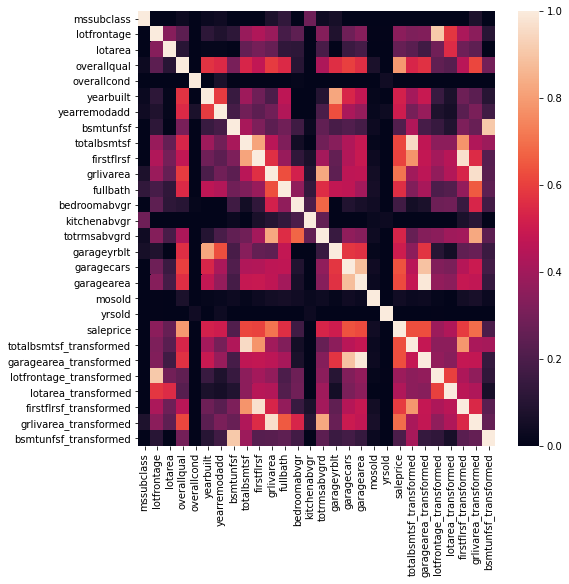

In [0]:
plt.figure(figsize=(8,8))
sns.heatmap(df[col_num_fea].corr(), vmin=0, vmax=1)

Identify features that are highly correlated (r>0.8).

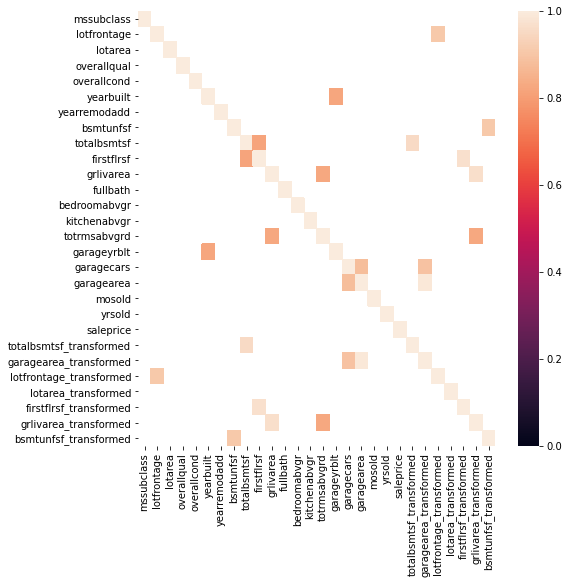

In [0]:
plt.figure(figsize=(8,8))
sns.heatmap(df[col_num_fea].corr()[abs(df[col_num_fea].corr())>0.8], vmin=0, vmax=1)

Drop one feature from each highly-correlated pairs.

In [0]:
unwanted_fea = ['lotfrontage','bsmtunfsf','totalbsmtsf','firstflrsf','grlivarea','garagearea',
                'garageyrblt', 'totrmsabvgrd', 'garagecars']
col_num_fea = [i for i in col_num_fea if i not in unwanted_fea]

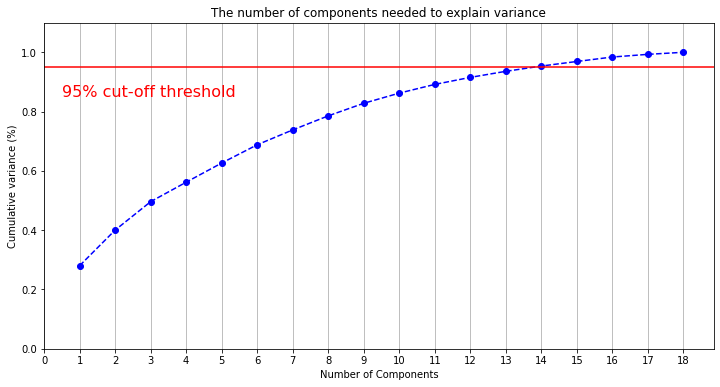

In [0]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

col_num_fea2 = col_num_fea
col_num_fea2.remove('saleprice')
number_of_fea = len(col_num_fea2) + 1

X = df[col_num_fea2]
X = StandardScaler().fit_transform(X)

pca = PCA().fit(X)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, number_of_fea, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, number_of_fea, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [0]:
pca_col = ["pca_1", "pca_2", "pca_3", "pca_4", "pca_5","pca_6","pca_7","pca_8","pca_9","pca_10","pca_11","pca_12","pca_13","pca_14"]

sklearn_pca = PCA(n_components=14)
df[pca_col] = pd.DataFrame(sklearn_pca.fit_transform(X))

print(
    'The percentage of total variance in the dataset explained by each',
    'component from Sklearn PCA:\n',
    sklearn_pca.explained_variance_ratio_*100
)

The percentage of total variance in the dataset explained by each component from Sklearn PCA:
 [28.01907489 12.01028596  9.58812894  6.56965204  6.46526623  6.15907083
  5.01374901  4.7391944   4.23990672  3.42844772  2.93610808  2.36950465
  2.04712535  1.77781208]


About 28% of the total variance is explained by the first principal component, 12% by the 2nd PCA, 10% by the 3rd PCA, etc.

In [0]:
abs(df[col_num_fea + pca_col + ['saleprice']].corr()['saleprice']).sort_values(ascending=False)

saleprice                  1.000000
pca_1                      0.834358
overallqual                0.790982
grlivarea_transformed      0.695118
garagearea_transformed     0.630095
totalbsmtsf_transformed    0.629713
firstflrsf_transformed     0.591264
fullbath                   0.560664
yearbuilt                  0.522897
yearremodadd               0.507101
lotarea_transformed        0.434346
lotfrontage_transformed    0.387949
lotarea                    0.263843
bsmtunfsf_transformed      0.197070
bedroomabvgr               0.168213
pca_10                     0.143116
pca_4                      0.138646
kitchenabvgr               0.135907
pca_2                      0.123002
pca_6                      0.098213
mssubclass                 0.084284
overallcond                0.077856
pca_8                      0.060683
pca_12                     0.058851
pca_13                     0.054116
pca_3                      0.053520
mosold                     0.046432
pca_7                      0

In [0]:
# select features with correlation btwn 0.3 to 0.8 with saleprice
col_num_fea_final = ['pca_1', 'overallqual', 'grlivarea_transformed',
                     'garagearea_transformed', 'totalbsmtsf_transformed', 'firstflrsf_transformed',
                     'fullbath', 'yearbuilt', 'yearremodadd',
                     'lotarea_transformed', 'lotfrontage_transformed']

# Categorical variables

In [0]:
# get column names for the continuous variables
col_obj = df.select_dtypes(['object']).columns.tolist()

df.select_dtypes(['object'])

,mszoning,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfintype2,heating,heatingqc,centralair,electrical,kitchenqual,functional,fireplacequ,garagetype,garagefinish,garagequal,garagecond,paveddrive,poolqc,fence,miscfeature,saletype,salecondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,None,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1456,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,Plywood,Plywood,Stone,TA,TA,CBlock,Gd,TA,No,ALQ,Rec,GasA,TA,Y,SBrkr,TA,Min1,TA,Attchd,Unf,TA,TA,Y,None,MnPrv,None,WD,Normal
1457,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,CemntBd,CmentBd,None,Ex,Gd,Stone,TA,Gd,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,None,GdPrv,Shed,WD,Normal
1458,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,TA,TA,Mn,GLQ,Rec,GasA,Gd,Y,FuseA,Gd,Typ,None,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal


Inspect unique values of categorical features to ensure there are no unintended repeats/duplicates (from misspelling or miscapitalization, for example).

In [0]:
for i in col_obj:
  print(i, '\t', df[i].unique())

mszoning 	 ['RL' 'RM' 'C (all)' 'FV' 'RH']
street 	 ['Pave' 'Grvl']
alley 	 [None 'Grvl' 'Pave']
lotshape 	 ['Reg' 'IR1' 'IR2' 'IR3']
landcontour 	 ['Lvl' 'Bnk' 'Low' 'HLS']
utilities 	 ['AllPub' 'NoSeWa']
lotconfig 	 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
landslope 	 ['Gtl' 'Mod' 'Sev']
neighborhood 	 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
condition1 	 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
condition2 	 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
bldgtype 	 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
housestyle 	 ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']
roofstyle 	 ['Gable' 'Hip' 'Gambrel' 'Mansard' 'Flat' 'Shed']
roofmatl 	 ['CompShg' 'WdShngl' 'Metal' 'WdShake' 'Membran' 'Tar&Grv' 'Roll'
 'ClyTile']
e

Count the number of unique values in each categorical feature.

In [0]:
for i in col_obj:
    print(i, '\t', df[i].nunique())

mszoning 	 5
street 	 2
alley 	 2
lotshape 	 4
landcontour 	 4
utilities 	 2
lotconfig 	 5
landslope 	 3
neighborhood 	 25
condition1 	 9
condition2 	 8
bldgtype 	 5
housestyle 	 8
roofstyle 	 6
roofmatl 	 8
exterior1st 	 15
exterior2nd 	 16
masvnrtype 	 4
exterqual 	 4
extercond 	 5
foundation 	 6
bsmtqual 	 4
bsmtcond 	 4
bsmtexposure 	 4
bsmtfintype1 	 6
bsmtfintype2 	 6
heating 	 6
heatingqc 	 5
centralair 	 2
electrical 	 5
kitchenqual 	 4
functional 	 7
fireplacequ 	 5
garagetype 	 6
garagefinish 	 3
garagequal 	 5
garagecond 	 5
paveddrive 	 3
poolqc 	 3
fence 	 4
miscfeature 	 4
saletype 	 9
salecondition 	 6


Remove categorical features whose number of unique values is >~1% of the total number of observations (>=15 unique values).

In [0]:
col_obj_fea = col_obj

unwanted_fea = ['neighborhood', 'exterior1st', 'exterior2nd']
col_obj_fea = [i for i in col_obj_fea if i not in unwanted_fea]

Investigate value counts of subcategories in categorical features.


In [0]:
for i in col_obj_fea:
  print(i)
  print(df[i].value_counts())

mszoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64
street
Pave    1454
Grvl       6
Name: street, dtype: int64
alley
Grvl    50
Pave    41
Name: alley, dtype: int64
lotshape
Reg    925
IR1    484
IR2     41
IR3     10
Name: lotshape, dtype: int64
landcontour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: landcontour, dtype: int64
utilities
AllPub    1459
NoSeWa       1
Name: utilities, dtype: int64
lotconfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: lotconfig, dtype: int64
landslope
Gtl    1382
Mod      65
Sev      13
Name: landslope, dtype: int64
condition1
Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: condition1, dtype: int64
condition2
Norm      1445
Feedr        6
RRNn         2
PosN         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: condition2, dt

In [0]:
# get % of occurence
for i in col_obj_fea:
  print(i, df[i].nunique())
  print(round(df[i].value_counts()/df[i].value_counts().sum()*100, 1))

mszoning 5
RL         78.8
RM         14.9
FV          4.5
RH          1.1
C (all)     0.7
Name: mszoning, dtype: float64
street 2
Pave    99.6
Grvl     0.4
Name: street, dtype: float64
alley 2
Grvl    54.9
Pave    45.1
Name: alley, dtype: float64
lotshape 4
Reg    63.4
IR1    33.2
IR2     2.8
IR3     0.7
Name: lotshape, dtype: float64
landcontour 4
Lvl    89.8
Bnk     4.3
HLS     3.4
Low     2.5
Name: landcontour, dtype: float64
utilities 2
AllPub    99.9
NoSeWa     0.1
Name: utilities, dtype: float64
lotconfig 5
Inside     72.1
Corner     18.0
CulDSac     6.4
FR2         3.2
FR3         0.3
Name: lotconfig, dtype: float64
landslope 3
Gtl    94.7
Mod     4.5
Sev     0.9
Name: landslope, dtype: float64
condition1 9
Norm      86.3
Feedr      5.5
Artery     3.3
RRAn       1.8
PosN       1.3
RRAe       0.8
PosA       0.5
RRNn       0.3
RRNe       0.1
Name: condition1, dtype: float64
condition2 8
Norm      99.0
Feedr      0.4
RRNn       0.1
PosN       0.1
Artery     0.1
RRAn       0.1
PosA

Remove highly imbalanced features where the most frequent value occurs more than 85% of the time.

In [0]:
# unwanted_col = col where the most frequent value occurs more than 85% of the time
unwanted_fea = []

for i in col_obj_fea:
  if round(df[i].value_counts()/df[i].value_counts().sum()*100, 1)[0] > 85:
    print('>85%', i)
    unwanted_fea.append(i)

  # elif round(df[i].value_counts()/df[i].value_counts().sum()*100, 1)[-1] < 0.5:
  #   print('<0.5%', i)
  #   unwanted_fea.append(i)

col_obj_fea = [i for i in col_obj_fea if i not in unwanted_fea]

>85% street
>85% landcontour
>85% utilities
>85% landslope
>85% condition1
>85% condition2
>85% roofmatl
>85% extercond
>85% bsmtcond
>85% bsmtfintype2
>85% heating
>85% centralair
>85% electrical
>85% functional
>85% garagequal
>85% garagecond
>85% paveddrive
>85% miscfeature
>85% saletype


## Missing values

In [0]:
# get the number of missing values
df[col_obj_fea].isnull().sum().sort_values(ascending=False)

poolqc           1453
alley            1369
fence            1179
fireplacequ       690
garagefinish       81
garagetype         81
bsmtexposure       38
bsmtqual           37
bsmtfintype1       37
masvnrtype          8
housestyle          0
lotshape            0
lotconfig           0
bldgtype            0
salecondition       0
roofstyle           0
exterqual           0
foundation          0
heatingqc           0
kitchenqual         0
mszoning            0
dtype: int64

In [0]:
# get the % of missing values
round(df[col_obj_fea].isnull().sum()/len(df[col_obj_fea])*100, 1).sort_values(ascending=False).head(20)

poolqc           99.5
alley            93.8
fence            80.8
fireplacequ      47.3
garagefinish      5.5
garagetype        5.5
bsmtexposure      2.6
bsmtqual          2.5
bsmtfintype1      2.5
masvnrtype        0.5
housestyle        0.0
lotshape          0.0
lotconfig         0.0
bldgtype          0.0
salecondition     0.0
roofstyle         0.0
exterqual         0.0
foundation        0.0
heatingqc         0.0
kitchenqual       0.0
dtype: float64

Remove features with >45% missing values.

In [0]:
unwanted_fea = ['poolqc', 'miscfeature', 'alley', 'fence', 'fireplacequ']
col_obj_fea = [i for i in col_obj_fea if i not in unwanted_fea]

Fill in the missing values for the rest of the variables with the modes grouped by the neighborhood where the house is located.


In [0]:
# fill in missing values
col_obj_incomplete = ['garagecond', 'garagequal', 'garagefinish', 'garagetype',
                      'bsmtfintype2', 'bsmtexposure', 'bsmtfintype1', 'bsmtqual',
                      'bsmtcond', 'masvnrtype', 'electrical']

neighborhood = df.neighborhood.unique()

# for i in col_obj_incomplete:
for i in col_obj_fea:
  for j in neighborhood:
      df[i][df.neighborhood == j] = df[i][df.neighborhood == j].fillna(df[i][df.neighborhood == j].mode()[0])

In [0]:
# check the resultant number of missing values
df[col_obj_fea].isnull().sum().sort_values(ascending=False).head()

salecondition    0
exterqual        0
lotshape         0
lotconfig        0
bldgtype         0
dtype: int64

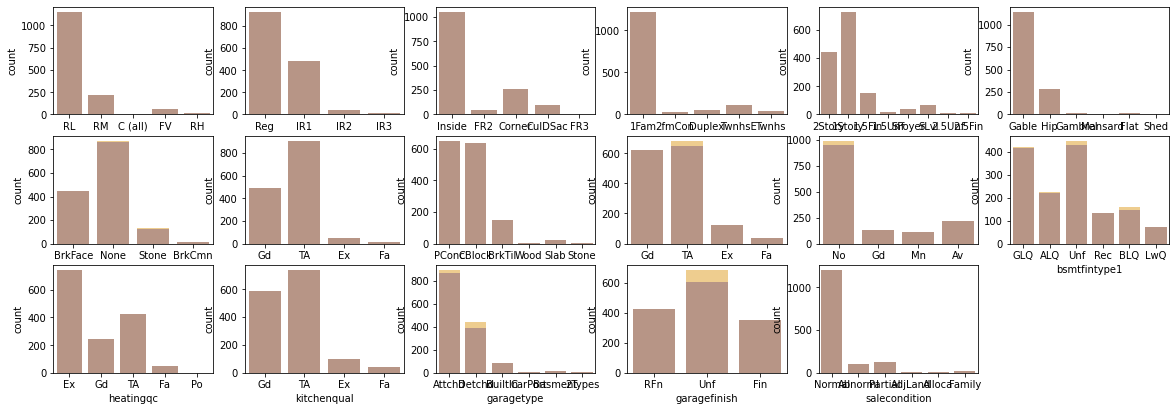

In [0]:
# plot histogram with and without filling in missing values
fig = plt.figure(figsize = (20,40))
# for i, col in enumerate(col_obj_incomplete):
for i, col in enumerate(col_obj_fea):
  plt.subplot(len(col_obj_fea), 6, i+1)
  # plt.subplot(len(col_obj_incomplete), 6, i+1)
  sns.countplot(df_ori[col], alpha = 0.5, color = 'blue')
  sns.countplot(df[col], alpha = 0.5, color = 'orange')

plt.show()

The fillna method seems reasonable. It seems that the additional filled-in missing values does not alter the original distribution of the variables significantly.

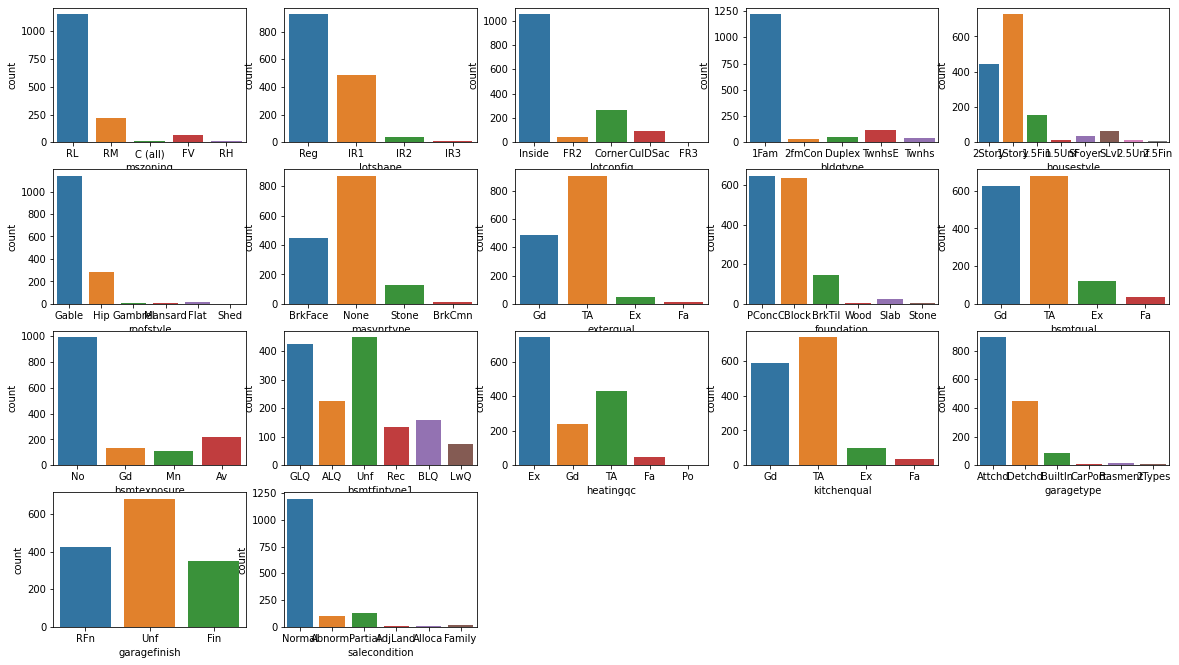

In [0]:
plt.figure(figsize=(20,50))

for i, col in enumerate(col_obj_fea):
    plt.subplot(len(col_obj_fea), 5, i+1)
    sns.countplot(df[col])

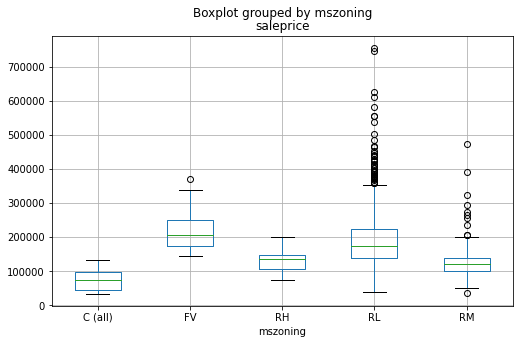

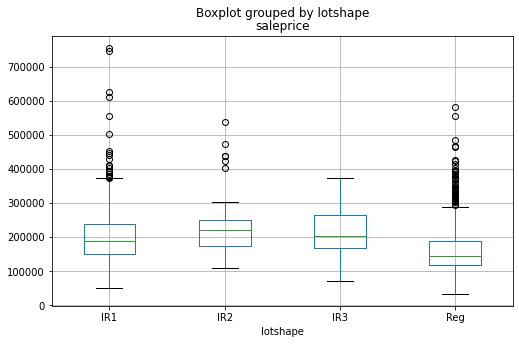

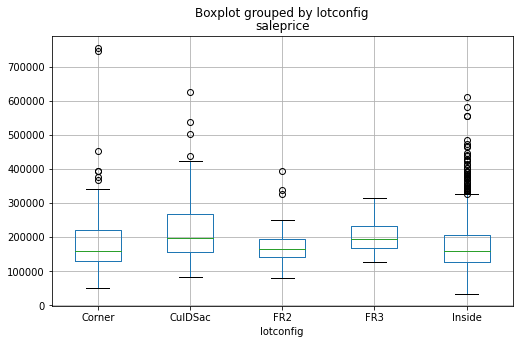

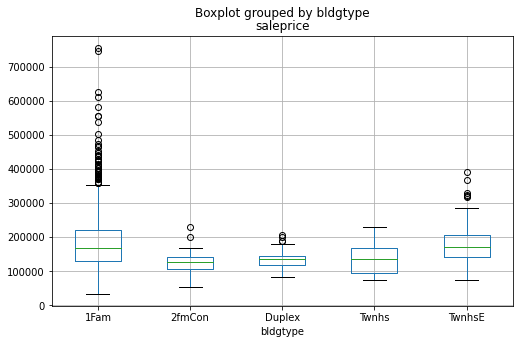

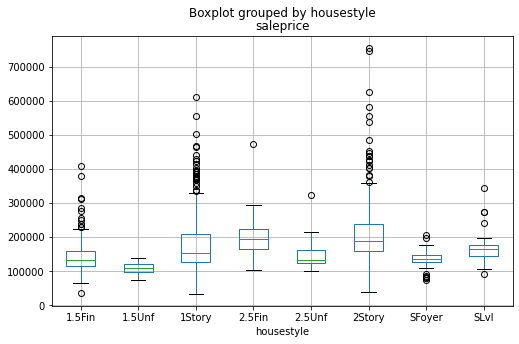

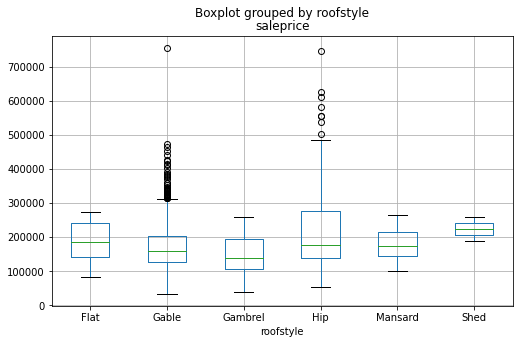

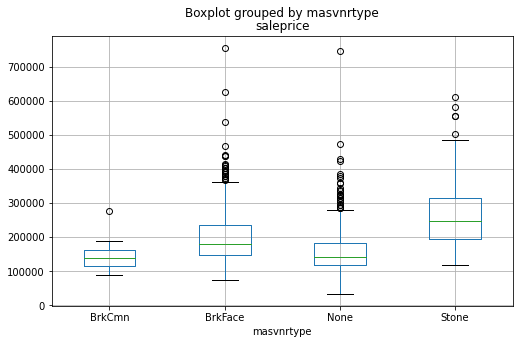

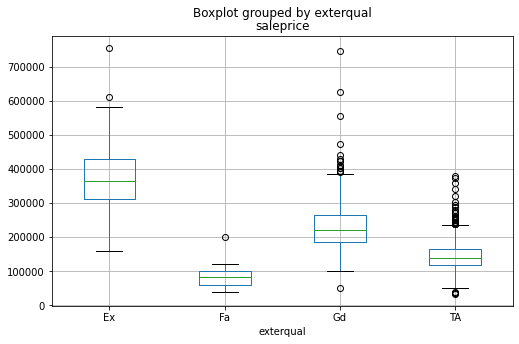

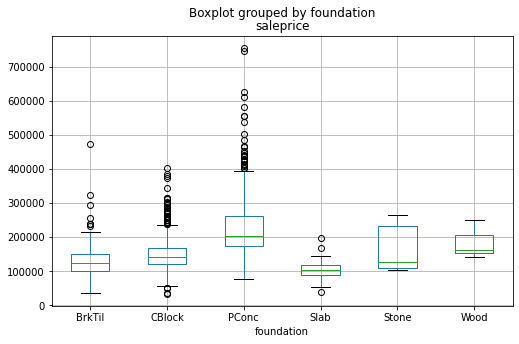

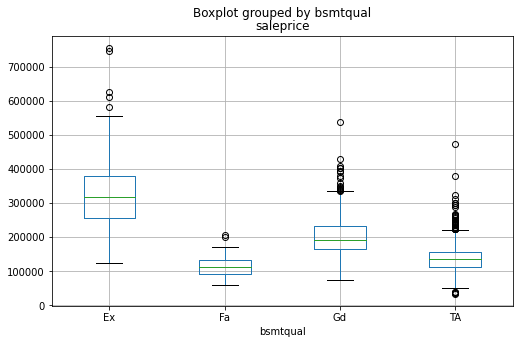

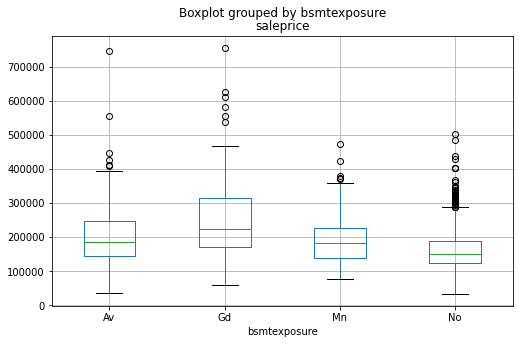

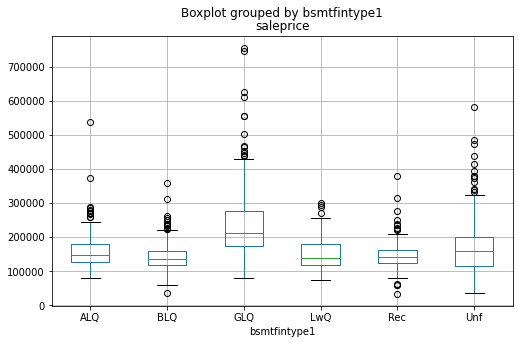

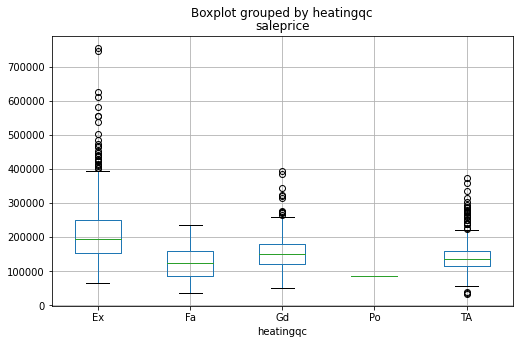

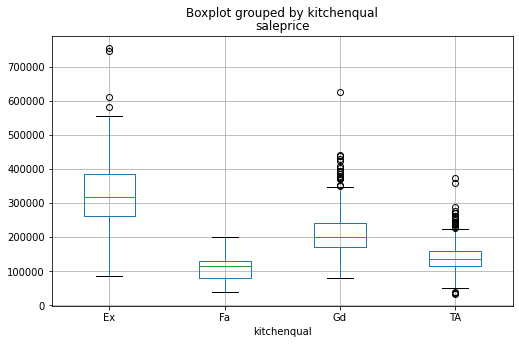

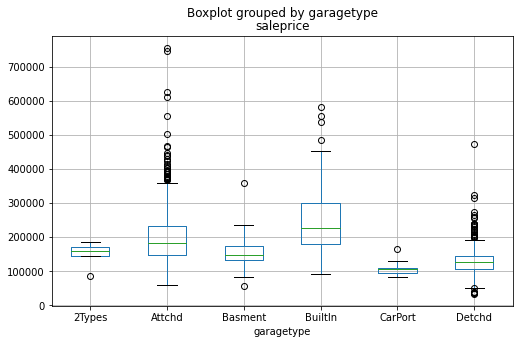

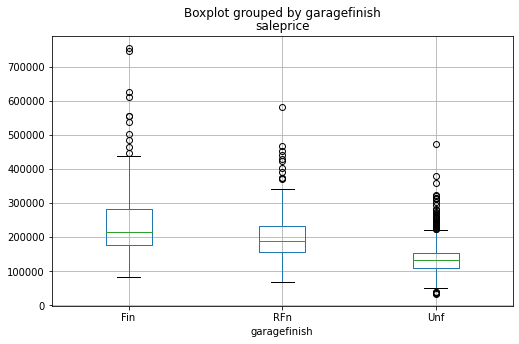

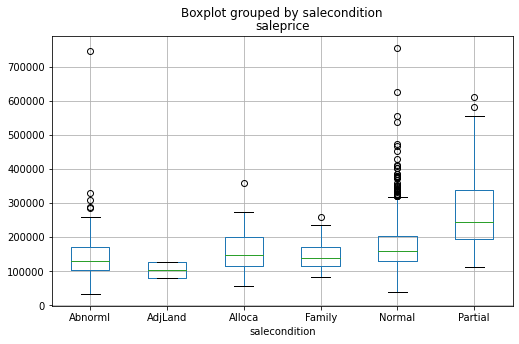

In [0]:
for i in col_obj_fea:
  df.boxplot('saleprice', by = i, figsize=(8,5))

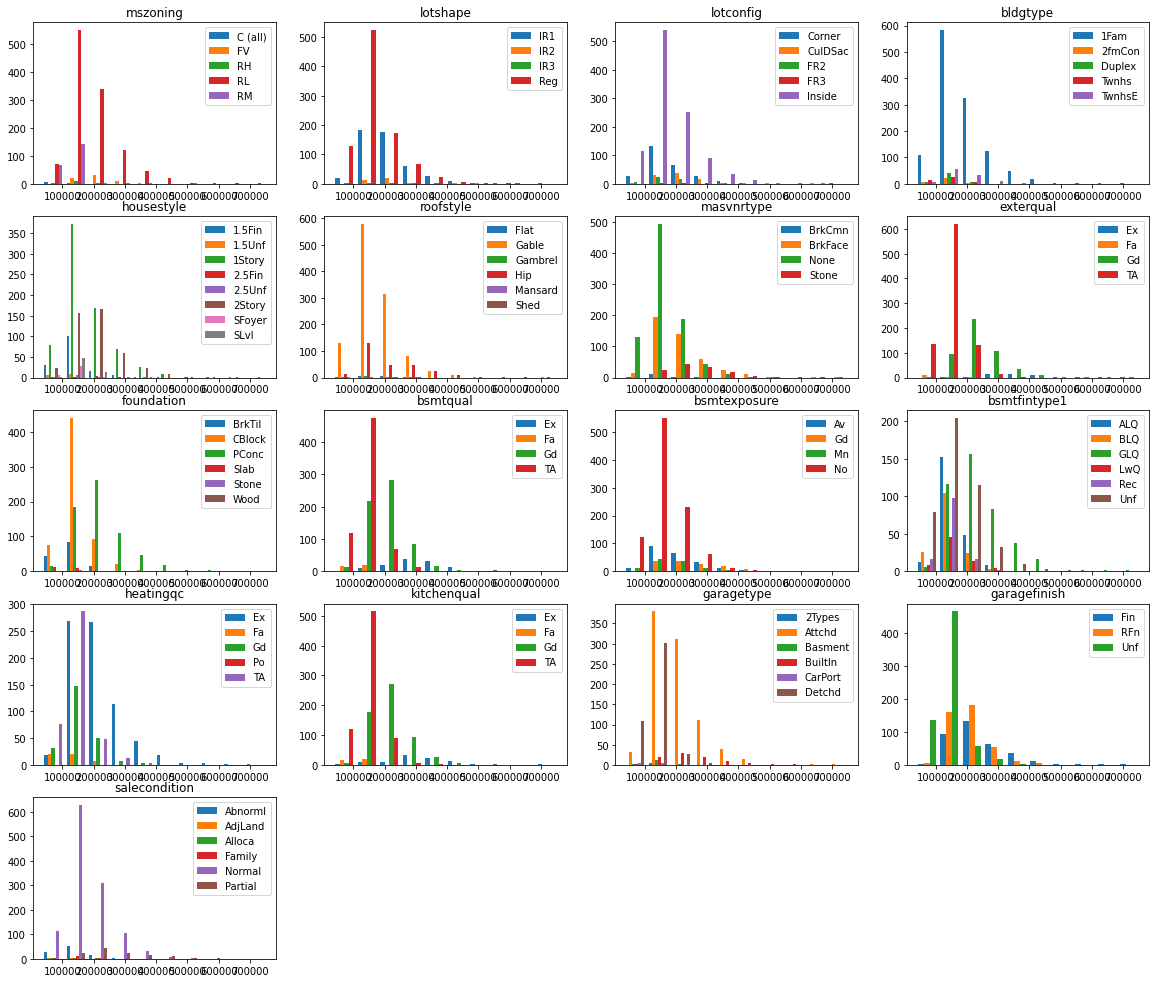

In [0]:
plt.figure(figsize=(20,60))

for i, col in enumerate(col_obj_fea):
  plt.subplot(len(col_obj_fea), 4, i+1)
  plt.hist([*[group["saleprice"].values for name, group in df[col_obj_fea + ['saleprice']].groupby(col)]], 
           label = [name for name, group in df[col_obj_fea + ['saleprice']].groupby(col)])
  plt.title(col)
  plt.legend()

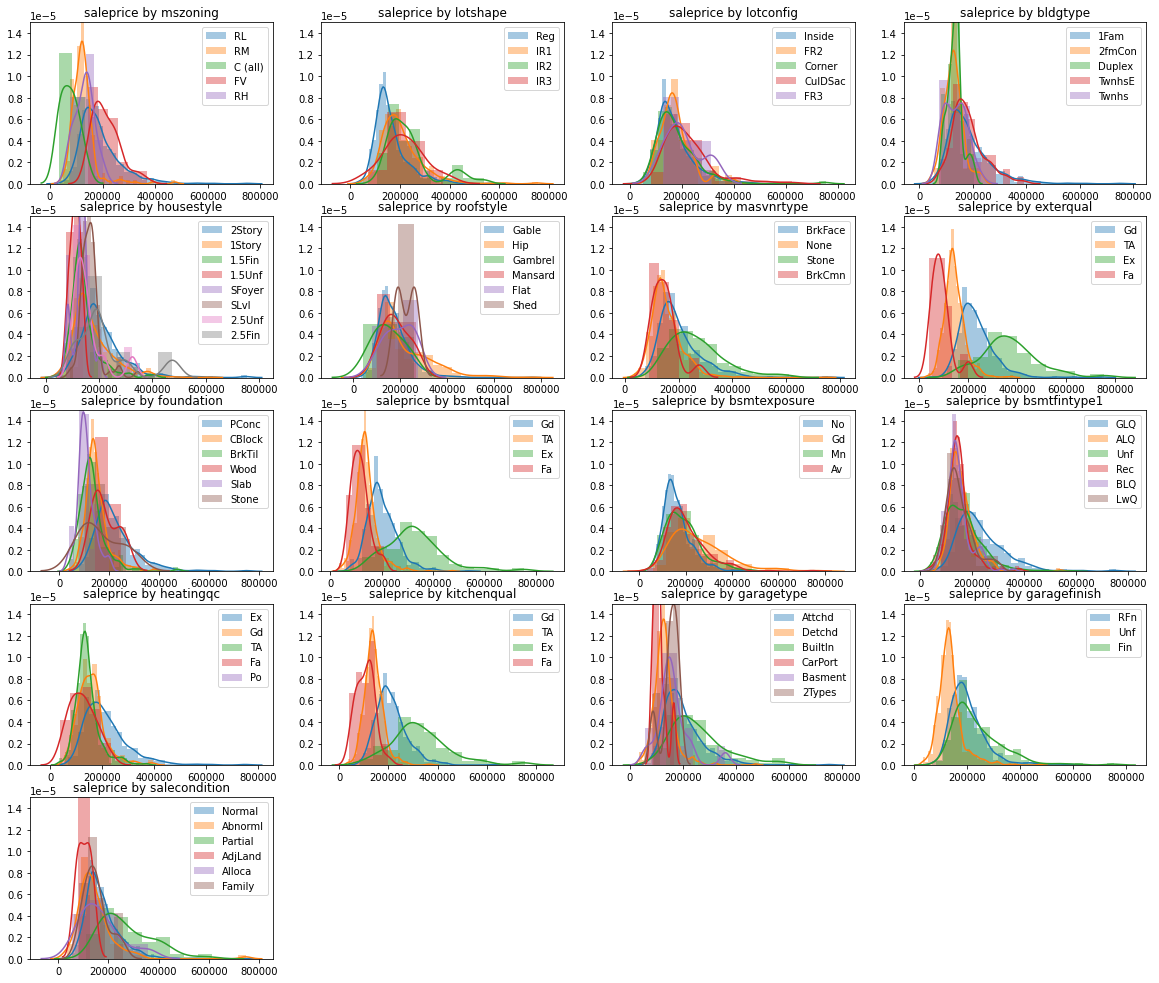

In [0]:
plt.figure(figsize=(20,60))

for i, col in enumerate(col_obj_fea):
  plt.subplot(len(col_obj_fea), 4, i+1)

  for j in df[col].unique():
      sns.distplot(df.saleprice[df[col]==j], label = j)#, 

  plt.legend()
  plt.xlabel('')
  plt.ylim(0,1.5e-5)
  plt.title('saleprice by {}'.format(col))

In [0]:
len(col_obj_fea)

17

In [0]:
df_dummies = pd.get_dummies(df, columns = col_obj_fea, drop_first=True)
df_dummies.columns.tolist()

['id',
 'mssubclass',
 'lotfrontage',
 'lotarea',
 'street',
 'alley',
 'landcontour',
 'utilities',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'overallqual',
 'overallcond',
 'yearbuilt',
 'yearremodadd',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrarea',
 'extercond',
 'bsmtcond',
 'bsmtfinsf1',
 'bsmtfintype2',
 'bsmtfinsf2',
 'bsmtunfsf',
 'totalbsmtsf',
 'heating',
 'centralair',
 'electrical',
 'firstflrsf',
 'secondflrsf',
 'lowqualfinsf',
 'grlivarea',
 'bsmtfullbath',
 'bsmthalfbath',
 'fullbath',
 'halfbath',
 'bedroomabvgr',
 'kitchenabvgr',
 'totrmsabvgrd',
 'functional',
 'fireplaces',
 'fireplacequ',
 'garageyrblt',
 'garagecars',
 'garagearea',
 'garagequal',
 'garagecond',
 'paveddrive',
 'wooddecksf',
 'openporchsf',
 'enclosedporch',
 'threessnporch',
 'screenporch',
 'poolarea',
 'poolqc',
 'fence',
 'miscfeature',
 'miscval',
 'mosold',
 'yrsold',
 'saletype',
 'saleprice',
 'totalbsmtsf_transformed',
 'garagearea_transformed',
 'lotfront

In [0]:
len(col_num_fea + col_obj_fea)

35

In [0]:
# col_dummy = ['mszoning_FV', 'mszoning_RH', 'mszoning_RL', 'mszoning_RM',
#              'lotshape_IR2', 'lotshape_IR3', 'lotshape_Reg',
#              'bldgtype_2fmCon', 'bldgtype_Duplex', 'bldgtype_Twnhs', 'bldgtype_TwnhsE',
#              'housestyle_1.5Unf', 'housestyle_1Story', 'housestyle_2.5Fin', 'housestyle_2.5Unf', 'housestyle_2Story', 'housestyle_SFoyer', 'housestyle_SLvl',
#              'masvnrtype_BrkFace', 'masvnrtype_None', 'masvnrtype_Stone',
#              'exterqual_Fa', 'exterqual_Gd', 'exterqual_TA',
#              'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA',
#              'bsmtexposure_Gd', 'bsmtexposure_Mn', 'bsmtexposure_No',
#              'bsmtfintype1_BLQ', 'bsmtfintype1_GLQ', 'bsmtfintype1_LwQ', 'bsmtfintype1_Rec', 'bsmtfintype1_Unf',
#              'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA',
#              'garagefinish_RFn', 'garagefinish_Unf']
col_dummy = df_dummies.columns.tolist()[85:]
df_dummies2 = df_dummies.copy()[col_num_fea + col_dummy + ['saleprice']]
df_dummies2

,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,fullbath,bedroomabvgr,kitchenabvgr,mosold,yrsold,totalbsmtsf_transformed,garagearea_transformed,lotfrontage_transformed,lotarea_transformed,firstflrsf_transformed,grlivarea_transformed,bsmtunfsf_transformed,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,lotshape_IR2,lotshape_IR3,lotshape_Reg,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,roofstyle_Gambrel,...,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,saleprice
0,60,8450,7,5,2003,2003,2,3,1,2,2008,856,548,65.0,8450,2.932474,3.232996,13,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,208500
1,20,9600,6,8,1976,1976,2,3,1,5,2007,1262,460,80.0,9600,3.101059,3.101059,17,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,181500
2,60,11250,7,5,2001,2002,2,3,1,9,2008,920,608,68.0,11250,2.963788,3.251881,20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,223500
3,70,9550,7,5,1915,1970,1,3,1,2,2006,756,642,60.0,9550,2.982723,3.234770,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,140000
4,60,14260,8,5,2000,2000,2,4,1,12,2008,1145,836,84.0,14260,3.058805,3.342028,21,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,2,3,1,8,2007,953,460,62.0,7917,2.979093,3.216694,27,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,175000
1456,20,13175,6,6,1978,1988,2,3,1,2,2010,1542,500,85.0,13175,3.316599,3.316599,22,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,210000
1457,70,9042,7,9,1941,2006,2,4,1,5,2010,1152,252,66.0,9042,3.074816,3.369216,26,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,266500
1458,20,9717,5,6,1950,1996,1,2,1,4,2010,1078,240,68.0,9717,3.032619,3.032619,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,142125


# Model Building

In [0]:
X = df_dummies2.drop(columns = ['saleprice'])
y = df_dummies2['saleprice']

# We create a LinearRegression model object
# from scikit-learn's linear_model module.
lrm = linear_model.LinearRegression()

# fit method estimates the coefficients using OLS
lrm.fit(X, y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 7.18655553e+00  2.74592289e-01  1.07777579e+04  6.29816815e+03
  1.05615302e+02 -1.37465094e+01  7.65861925e+03 -2.98406808e+03
 -1.33145993e+04 -2.50178218e+01 -8.43779949e+02  4.32103723e+01
  2.92114129e+01  7.66772641e+01  1.46376765e+00 -3.82630502e+04
  1.74818601e+05 -6.85127161e+02  2.70593392e+04  2.26881145e+04
  2.22071538e+04  1.71551358e+04  5.52412967e+03 -4.13172871e+04
 -8.49117949e+02  9.94308036e+03 -1.08734263e+04 -1.99577167e+04
  3.06644994e+02 -1.27363550e+04 -1.54088474e+04 -1.11344539e+04
 -6.42840874e+03  1.60476899e+04  6.30741412e+03  4.10595463e+03
 -5.06942833e+03  5.56649077e+03 -1.90205982e+03 -1.49431396e+03
  2.24713762e+04  2.35500585e+04  2.57077529e+04  2.66946394e+04
  1.32247824e+04  1.25460170e+04  1.24883984e+04  1.26842600e+04
 -1.34651510e+04 -1.72290955e+04 -2.50127560e+04  2.88531486e+03
  6.00908262e+03  2.21915726e+04  8.41833577e+03 -2.27614470e+04
 -3.17748703e+04 -2.90348284e+04 -3.05278094e+04  1.48668551e+04
 -3.0768

In [0]:
import statsmodels.api as sm

# need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     93.42
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        12:56:28   Log-Likelihood:                -17139.
No. Observations:                1460   AIC:                         3.445e+04
Df Residuals:                    1373   BIC:                         3.491e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1.093e+06   1.33e+06      0.824      0.410   -1.51e+06     3.7e+06
mssubclass                  7.1866    102.980      0.070      0.944    -194.829     209.202
lotarea                     0.2746      0.109      2.529      0.012       0.062       0.488
overallqual              1.078e+04   1227.440      8.781      0.000    8369.898    1.32e+04
overallcond              6298.1682    999.492      6.301      0.000    4337.472    8258.865
yearbuilt                 105.6153     76.345      1.383      0.167     -44.149     255.380
yearremodadd              -13.7465     66.810     -0.206      0.837    -144.807     117.314
fullbath                 7658.6193   2433.479      3.147      0.002    2884.880    1.24e+04
bedroomabvgr            -2984.0681   1538.936     -1.939      0.053   -6002.989      34.853
kitchenabvgr            -1.331e+04   6721.026     -1.981      0.048   -2.65e+04    -130.007
mosold                    -25.0178    314.995     -0.079      0.937    -642.942     592.906
yrsold                   -843.7799    655.901     -1.286      0.199   -2130.456     442.896
totalbsmtsf_transformed    43.2104      5.203      8.304      0.000      33.003      53.418
garagearea_transformed     29.2114      5.991      4.876      0.000      17.459      40.964
lotfrontage_transformed    76.6773     76.665      1.000      0.317     -73.715     227.070
lotarea_transformed         1.4638      0.424      3.455      0.001       0.633       2.295
firstflrsf_transformed  -3.826e+04   2.31e+04     -1.655      0.098   -8.36e+04    7089.163
grlivarea_transformed    1.748e+05   2.54e+04      6.879      0.000    1.25e+05    2.25e+05
bsmtunfsf_transformed    -685.1272    157.327     -4.355      0.000    -993.754    -376.500
mszoning_FV              2.706e+04   1.19e+04      2.265      0.024    3625.194    5.05e+04
mszoning_RH              2.269e+04   1.35e+04      1.679      0.093   -3815.667    4.92e+04
mszoning_RL              2.221e+04   1.11e+04      1.999      0.046     411.741     4.4e+04
mszoning_RM              1.716e+04   1.11e+04      1.541      0.124   -4686.017     3.9e+04
lotshape_IR2             5524.1297   5456.452      1.012      0.312   -5179.755    1.62e+04
lotshape_IR3            -4.132e+04   1.06e+04     -3.883      0.000   -6.22e+04   -2.04e+04
lotshape_Reg             -849.1179   2026.483     -0.419      0.675   -4824.455    3126.219
lotconfig_CulDSac        9943.0804   4269.102      2.329      0.020    1568.411    1.83e+04
lotconfig_FR2           -1.087e+04   5186.712     -2.096      0.036    -2.1e+04    -698.687
lotconfig_FR3           -1.996e+04   1.61e+04     -1.238      0.216   -5.16e+04    1.17e+04
lotconfig_Inside          306.6450   2304.490      0.133      0.894   -4214.057    4827.347
bldgtype_2fmCon         -1.274e+04   1.53e+04  

This model's F statistic is 93.42, and the associated p-value is zero. This means that our features add some information to the reduced model and our model is useful in explaining charges.
The adjusted R-squared is 0.845

The statistically significant variables are 'lotarea', 'overallqual', 'overallcond', 'fullbath', 'kitchenabvgr', 'totalbsmtsf_transformed', 'garagearea_transformed', 'lotarea_transformed', 'grlivarea_transformed', 'bsmtunfsf_transformed', 'mszoning_FV', 'mszoning_RL', 'lotshape_IR3', 'lotconfig_CulDSac', 'lotconfig_FR2', 'roofstyle_Gable', 'roofstyle_Hip', 'exterqual_Gd', 'exterqual_TA', 'foundation_Slab', 'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA', 'bsmtexposure_Gd', 'bsmtexposure_No', 'bsmtfintype1_GLQ', 'kitchenqual_Fa', 'kitchenqual_Gd', 'kitchenqual_TA', 'garagetype_BuiltIn', 'salecondition_Partial'. All the other variables are statistically insignificant and hence their coefficients are statistically zero. According to the estimation results:

1 point increase in overallqual results in \$10780 increase in sale price.
1 point increase in overallcond results in \$6298 increase in sale price, etc.
Average sale price is higher in mszoning_FV, mszoning_RH, mszoning_RL, mszoning_RM than the base zone by \$27060, \$282690, \$22210, and \$17160 respectively. So, the average house price is the highest in mszoning_RH.

Exclude statistically insignificant attributes from the model.

In [0]:
hi_pvalue = ['heatingqc_Fa', 'mssubclass', 'mosold', 'lotconfig_Inside', 'yearremodadd', 'housestyle_SLvl', 'housestyle_SFoyer', 'garagefinish_Unf', 'housestyle_2.5Fin', 'lotshape_Reg', 'salecondition_Family', 'housestyle_2.5Unf', 'bsmtfintype1_Rec', 'garagetype_CarPort', 'roofstyle_Shed', 'bldgtype_TwnhsE', 'heatingqc_Po', 'foundation_Stone', 'bsmtfintype1_BLQ', 'foundation_CBlock', 'bsmtexposure_Mn', 'const', 'bldgtype_2fmCon', 'bldgtype_Twnhs', 'salecondition_AdjLand', 'garagetype_Basment', 'lotfrontage_transformed', 'lotshape_IR2', 'bsmtfintype1_Unf', 'housestyle_1Story', 'exterqual_Fa', 'heatingqc_Gd', 'foundation_Wood', 'lotconfig_FR3', 'yrsold', 'garagefinish_RFn', 'housestyle_2Story', 'garagetype_Attchd', 'masvnrtype_Stone', 'yearbuilt', 'foundation_PConc', 'masvnrtype_BrkFace', 'masvnrtype_None', 'bsmtfintype1_LwQ', 'mszoning_RM', 'housestyle_1.5Unf', 'garagetype_Detchd', 'salecondition_Normal', 'firstflrsf_transformed', 'mszoning_RH', 'bldgtype_Duplex', 'roofstyle_Gambrel', 'roofstyle_Mansard', 'heatingqc_TA', 'salecondition_Alloca', 'bedroomabvgr']
# hi_pvalue = hi_pvalue.split(', ')
X_col = X.columns.tolist()

X_col = [i for i in X_col if i not in hi_pvalue]
X_col

['lotarea',
 'overallqual',
 'overallcond',
 'fullbath',
 'kitchenabvgr',
 'totalbsmtsf_transformed',
 'garagearea_transformed',
 'lotarea_transformed',
 'grlivarea_transformed',
 'bsmtunfsf_transformed',
 'mszoning_FV',
 'mszoning_RL',
 'lotshape_IR3',
 'lotconfig_CulDSac',
 'lotconfig_FR2',
 'roofstyle_Gable',
 'roofstyle_Hip',
 'exterqual_Gd',
 'exterqual_TA',
 'foundation_Slab',
 'bsmtqual_Fa',
 'bsmtqual_Gd',
 'bsmtqual_TA',
 'bsmtexposure_Gd',
 'bsmtexposure_No',
 'bsmtfintype1_GLQ',
 'kitchenqual_Fa',
 'kitchenqual_Gd',
 'kitchenqual_TA',
 'garagetype_BuiltIn',
 'salecondition_Partial']

In [0]:
X2 = sm.add_constant(X[X_col])

results2 = sm.OLS(y, X2).fit()

results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     250.6
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        12:56:31   Log-Likelihood:                -17184.
No. Observations:                1460   AIC:                         3.443e+04
Df Residuals:                    1428   BIC:                         3.460e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.617e+05    2.8e+04    -12.912      0.000   -4.17e+05   -3.07e+05
lotarea                     0.2637      0.105      2.503      0.012       0.057       0.470
overallqual              1.196e+04   1151.622     10.386      0.000    9701.500    1.42e+04
overallcond              6212.1441    834.876      7.441      0.000    4574.430    7849.859
fullbath                 7199.6952   2312.520      3.113      0.002    2663.394    1.17e+04
kitchenabvgr             -2.44e+04   4276.167     -5.707      0.000   -3.28e+04    -1.6e+04
totalbsmtsf_transformed    35.5730      3.452     10.305      0.000      28.801      42.345
garagearea_transformed     30.8882      5.501      5.615      0.000      20.098      41.679
lotarea_transformed         1.6354      0.355      4.607      0.000       0.939       2.332
grlivarea_transformed    1.432e+05   9602.400     14.914      0.000    1.24e+05    1.62e+05
bsmtunfsf_transformed    -629.4558    128.022     -4.917      0.000    -880.587    -378.324
mszoning_FV              1.467e+04   4858.754      3.020      0.003    5140.459    2.42e+04
mszoning_RL              8301.9781   2611.564      3.179      0.002    3179.065    1.34e+04
lotshape_IR3             -3.94e+04   1.05e+04     -3.737      0.000   -6.01e+04   -1.87e+04
lotconfig_CulDSac        1.041e+04   3524.141      2.953      0.003    3495.276    1.73e+04
lotconfig_FR2           -8845.2689   4761.802     -1.858      0.063   -1.82e+04     495.609
roofstyle_Gable          7806.9129   5774.775      1.352      0.177   -3521.039    1.91e+04
roofstyle_Hip            1.122e+04   6064.966      1.850      0.065    -678.529    2.31e+04
exterqual_Gd            -1.218e+04   5076.305     -2.399      0.017   -2.21e+04   -2218.792
exterqual_TA            -2.233e+04   5296.653     -4.217      0.000   -3.27e+04   -1.19e+04
foundation_Slab          1.607e+04   7621.791      2.108      0.035    1118.391     3.1e+04
bsmtqual_Fa             -3.993e+04   7224.037     -5.527      0.000   -5.41e+04   -2.58e+04
bsmtqual_Gd              -3.35e+04   4060.089     -8.251      0.000   -4.15e+04   -2.55e+04
bsmtqual_TA             -3.803e+04   4723.132     -8.051      0.000   -4.73e+04   -2.88e+04
bsmtexposure_Gd          1.432e+04   3479.494      4.116      0.000    7495.956    2.11e+04
bsmtexposure_No         -3227.7655   2156.793     -1.497      0.135   -7458.588    1003.057
bsmtfintype1_GLQ         1.056e+04   2389.975      4.417      0.000    5868.177    1.52e+04
kitchenqual_Fa          -3.072e+04   7084.597     -4.336      0.000   -4.46e+04   -1.68e+04
kitchenqual_Gd           -2.98e+04   4311.124     -6.912      0.000   -3.83e+04   -2.13e+04
kitchenqual_TA          -3.373e+04   4784.195     -7.051      0.000   -4.31e+04   -2.43e+04
garagetype_BuiltIn       1.655e+04   3858.958  

After removing statically insignificant features, all of the remaining features are now statistically significant, except lotconfig_FR2, roofstyle_Gable, roofstyle_Hip, and bsmtexposure_No.

In [0]:
col_remove = ['lotconfig_FR2', 'roofstyle_Gable', 'roofstyle_Hip', 'bsmtexposure_No']
X_col3 = [i for i in X_col if i not in col_remove]

X3 = sm.add_constant(X[X_col3])

results3 = sm.OLS(y, X3).fit()

results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     286.2
Date:                Fri, 08 May 2020   Prob (F-statistic):               0.00
Time:                        13:00:56   Log-Likelihood:                -17189.
No. Observations:                1460   AIC:                         3.443e+04
Df Residuals:                    1432   BIC:                         3.458e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.525e+05   2.67e+04    -13.196      0.000   -4.05e+05      -3e+05
lotarea                     0.2705      0.106      2.564      0.010       0.064       0.477
overallqual              1.222e+04   1148.324     10.645      0.000    9971.694    1.45e+04
overallcond              6170.8804    835.102      7.389      0.000    4532.725    7809.036
fullbath                 6957.4720   2306.835      3.016      0.003    2432.334    1.15e+04
kitchenabvgr            -2.446e+04   4283.880     -5.711      0.000   -3.29e+04   -1.61e+04
totalbsmtsf_transformed    37.2876      3.381     11.029      0.000      30.656      43.919
garagearea_transformed     31.8875      5.499      5.799      0.000      21.101      42.674
lotarea_transformed         1.5882      0.353      4.504      0.000       0.897       2.280
grlivarea_transformed    1.417e+05   9504.864     14.907      0.000    1.23e+05     1.6e+05
bsmtunfsf_transformed    -661.1302    126.999     -5.206      0.000    -910.253    -412.007
mszoning_FV              1.407e+04   4859.003      2.895      0.004    4536.464    2.36e+04
mszoning_RL              8491.6979   2612.125      3.251      0.001    3367.696    1.36e+04
lotshape_IR3            -3.871e+04   1.06e+04     -3.668      0.000   -5.94e+04    -1.8e+04
lotconfig_CulDSac        1.084e+04   3517.551      3.081      0.002    3935.931    1.77e+04
exterqual_Gd            -1.311e+04   5030.748     -2.606      0.009    -2.3e+04   -3242.137
exterqual_TA            -2.325e+04   5255.779     -4.424      0.000   -3.36e+04   -1.29e+04
foundation_Slab          1.616e+04   7624.423      2.120      0.034    1207.207    3.11e+04
bsmtqual_Fa             -3.997e+04   7210.123     -5.543      0.000   -5.41e+04   -2.58e+04
bsmtqual_Gd             -3.388e+04   4040.368     -8.386      0.000   -4.18e+04    -2.6e+04
bsmtqual_TA             -3.799e+04   4701.149     -8.080      0.000   -4.72e+04   -2.88e+04
bsmtexposure_Gd          1.536e+04   3244.979      4.735      0.000    8999.046    2.17e+04
bsmtfintype1_GLQ         1.073e+04   2384.424      4.500      0.000    6052.081    1.54e+04
kitchenqual_Fa          -3.063e+04   7097.009     -4.316      0.000   -4.46e+04   -1.67e+04
kitchenqual_Gd          -2.991e+04   4319.495     -6.926      0.000   -3.84e+04   -2.14e+04
kitchenqual_TA          -3.385e+04   4788.499     -7.069      0.000   -4.32e+04   -2.45e+04
garagetype_BuiltIn       1.659e+04   3862.387      4.294      0.000    9009.779    2.42e+04
salecondition_Partial    1.143e+04   3437.839      3.326      0.001    4691.230    1.82e+04
==============================================================================
Omnibus:                      487.960   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            4642

All variables are now statistically significant. While the adjusted R-squared is lower, the F-statistic is higher and the AIC and BIC scores are lower. Thus, we conclude that this is a better model.

# Checking Gauss-Markov Assumptions

## Assumption 1: target variable is a linear function of the model's coefficients - CHECKED
Since we're using a linear regression model, this assumption is checked.

##Assumption 2: error term should be zero on average - CHECKED

In [0]:
lrm = linear_model.LinearRegression()
lrm.fit(X,y)
predictions = lrm.predict(X)
errors = y - predictions

print("Mean of the errors in the house prices model is: {}".format(np.mean(errors)))

Mean of the errors in the house prices model is: -2.911180410891363e-10


In [0]:
# using X3 features
lrm = linear_model.LinearRegression()
lrm.fit(X3,y)
predictions3 = lrm.predict(X3)
errors3 = y - predictions3

print("Mean of the errors in the house prices model is: {}".format(np.mean(errors3)))

Mean of the errors in the house prices model is: 3.352920741659321e-11


##Assumption 3: homoscedasticity - NOT CHECKED
(when the distribution of error terms is consistent for all predicted values i.e. the error variance doesn't change systematically across observations)

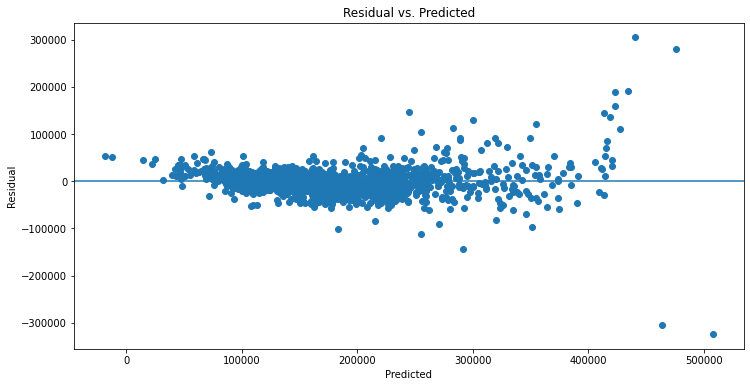

In [0]:
plt.scatter(predictions, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [0]:
from scipy.stats import bartlett
from scipy.stats import levene

bart_stats = bartlett(predictions, errors)
lev_stats = levene(predictions, errors)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

Bartlett test statistic value is 1015.03 and p value is 9.71e-223
Levene test statistic value is 710.303 and p value is 2.98e-140


The p-values of both tests are < 0.05. Hence, we reject the null hypothesis (of homoscedacity) and conclude that the errors are heteroscedastic.

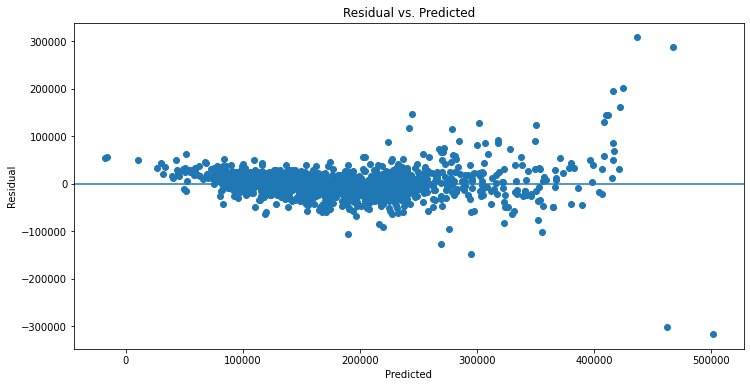

Bartlett test statistic value is 932.519 and p value is 8.37e-205
Levene test statistic value is 669.896 and p value is 3.81e-133


In [0]:
# using X3 features
plt.scatter(predictions3, errors3)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

bart_stats = bartlett(predictions3, errors3)
lev_stats = levene(predictions3, errors3)

print("Bartlett test statistic value is {0:3g} and p value is {1:.3g}".format(bart_stats[0], bart_stats[1]))
print("Levene test statistic value is {0:3g} and p value is {1:.3g}".format(lev_stats[0], lev_stats[1]))

The p-values of both tests are < 0.05. Hence, we reject the null hypothesis (of homoscedacity) and conclude that the errors are heteroscedastic.

## Assumption 4: low multicollinearity - CHECKED
This has been dealt with during EDA.

## Assumption 5: error terms are uncorrelated with one another - CHECKED

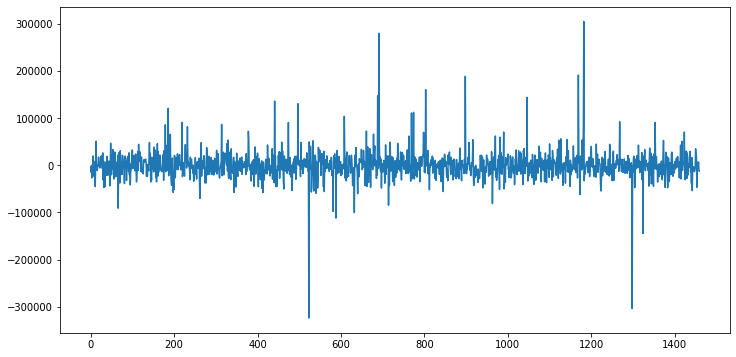

In [0]:
plt.plot(errors)
plt.show()

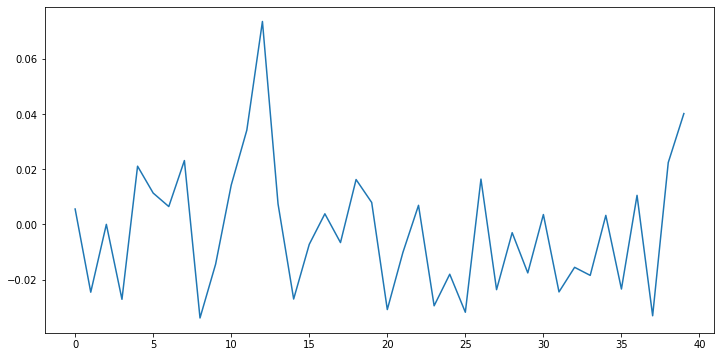

In [0]:
from statsmodels.tsa.stattools import acf

acf_data = acf(errors)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation between the errors of the model is very low (ranging between -0.04 and 0.06).

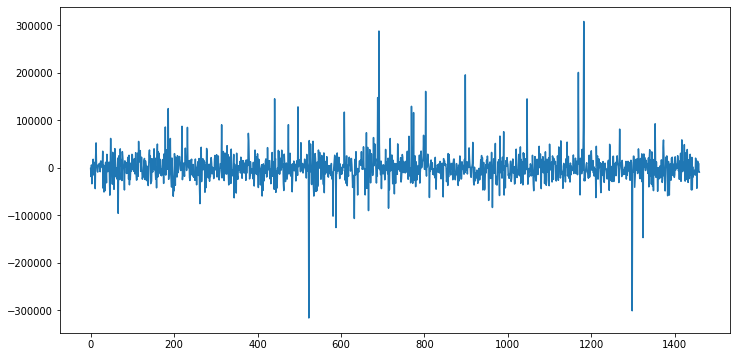

In [0]:
# using X3
plt.plot(errors3)
plt.show()

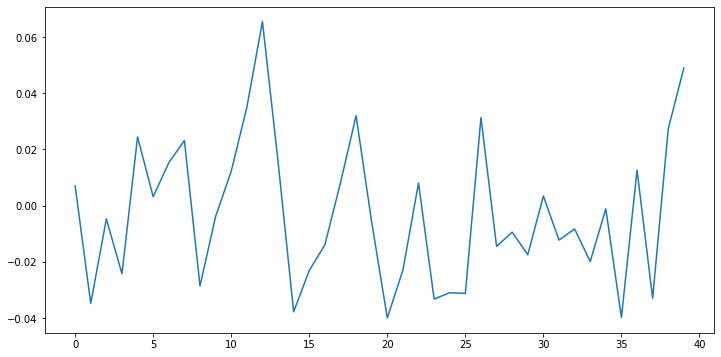

In [0]:
acf_data = acf(errors3)

plt.plot(acf_data[1:])
plt.show()

The autocorrelation between the errors of the X3 model is very low (ranging between -0.04 and 0.06).

## Assumption 6: Exogeneity - CHECKED
Features are not correlated with the errors

In [0]:
df2 = pd.concat([X, pd.DataFrame(errors.values, columns=["error"])], axis=1)
df2.corr().iloc[:,-1:]

,error
const,NaN
mssubclass,-3.851781e-14
lotarea,-1.387562e-12
overallqual,-7.875263e-14
overallcond,3.349656e-14
...,...
salecondition_Alloca,-9.260544e-14
salecondition_Family,2.798165e-13
salecondition_Normal,-5.158795e-13
salecondition_Partial,6.093449e-13


In [0]:
df3 = pd.concat([X3, pd.DataFrame(errors3.values, columns=["error3"])], axis=1)
df3.corr().iloc[:,-1:]

,error3
const,NaN
lotarea,-8.625487e-14
overallqual,2.386187e-14
overallcond,1.265639e-15
fullbath,3.786912e-15
kitchenabvgr,-5.009135e-15
totalbsmtsf_transformed,7.455021e-15
garagearea_transformed,1.948898e-14
lotarea_transformed,2.419248e-13
grlivarea_transformed,6.875617e-14


##Normality of the errors

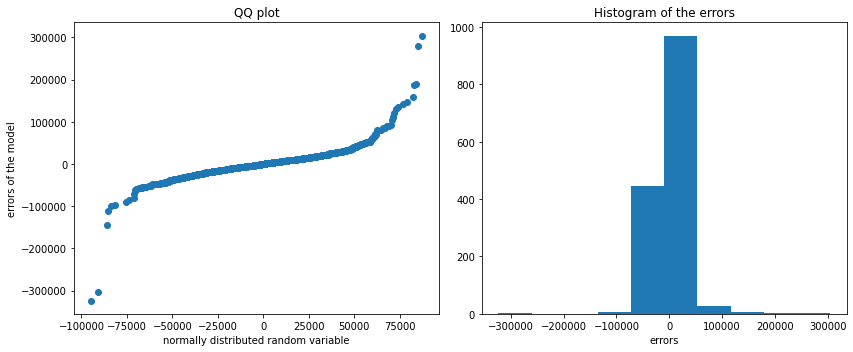

In [0]:
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors)) # we sort the arrays
plt.xlabel("normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [0]:
from scipy.stats import jarque_bera
from scipy.stats import normaltest

jb_stats = jarque_bera(errors)
norm_stats = normaltest(errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 58086.22316628345 and p value is 0.0
Normality test statistics is 483.19972925026957 and p value is 1.1871674068318988e-105


Since the p-values are < 0.05, we reject the null hypothesis and conclude that the errors are not normally distributed.

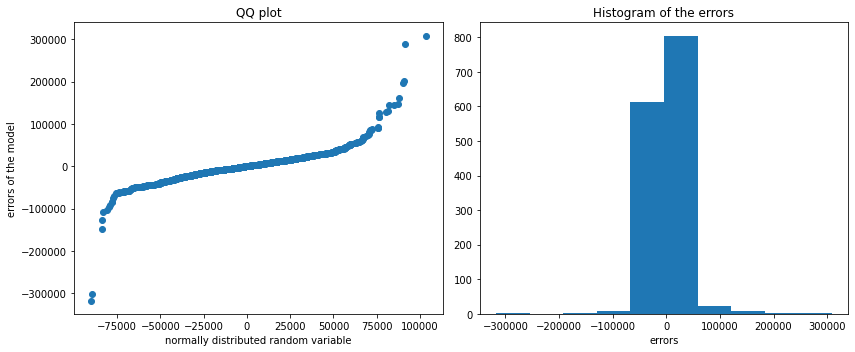

In [0]:
# using X3
rand_nums = np.random.normal(np.mean(errors), np.std(errors), len(errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(errors3)) # we sort the arrays
plt.xlabel("normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(errors3)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

In [0]:
jb_stats = jarque_bera(errors3)
norm_stats = normaltest(errors3)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 46429.40219958908 and p value is 0.0
Normality test statistics is 487.9602322116476 and p value is 1.0984540163271807e-106


Since the p-values are < 0.05, we reject the null hypothesis and conclude that the errors for X3 are not normally distributed.

# RFE

In [0]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV, RFE

lr = linear_model.LinearRegression() #RandomForestClassifier(random_state=101)
rfe = RFE(estimator=lr, step=1) #, scoring='accuracy')
rfe.fit(X, y)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=None, step=1, verbose=0)

In [0]:
print('Optimal number of features: {}'.format(rfe.n_features_))

Optimal number of features: 43


In [0]:
# investigate feature ranking
dict(zip(X.columns, rfe.ranking_))

{'bedroomabvgr': 16,
 'bldgtype_2fmCon': 3,
 'bldgtype_Duplex': 1,
 'bldgtype_Twnhs': 1,
 'bldgtype_TwnhsE': 1,
 'bsmtexposure_Gd': 1,
 'bsmtexposure_Mn': 18,
 'bsmtexposure_No': 1,
 'bsmtfintype1_BLQ': 36,
 'bsmtfintype1_GLQ': 12,
 'bsmtfintype1_LwQ': 1,
 'bsmtfintype1_Rec': 20,
 'bsmtfintype1_Unf': 1,
 'bsmtqual_Fa': 1,
 'bsmtqual_Gd': 1,
 'bsmtqual_TA': 1,
 'bsmtunfsf_transformed': 34,
 'const': 45,
 'exterqual_Fa': 1,
 'exterqual_Gd': 1,
 'exterqual_TA': 1,
 'firstflrsf_transformed': 4,
 'foundation_CBlock': 10,
 'foundation_PConc': 9,
 'foundation_Slab': 32,
 'foundation_Stone': 15,
 'foundation_Wood': 11,
 'fullbath': 8,
 'garagearea_transformed': 40,
 'garagefinish_RFn': 25,
 'garagefinish_Unf': 26,
 'garagetype_Attchd': 31,
 'garagetype_Basment': 1,
 'garagetype_BuiltIn': 1,
 'garagetype_CarPort': 13,
 'garagetype_Detchd': 23,
 'grlivarea_transformed': 1,
 'heatingqc_Fa': 27,
 'heatingqc_Gd': 22,
 'heatingqc_Po': 1,
 'heatingqc_TA': 21,
 'housestyle_1.5Unf': 1,
 'housestyle_1St

In [0]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error

def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('R_squared Score:', model.score(X, y))

    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_pred)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_pred_train)))

    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_pred.mean())
    print('Mean Selling Price:', y_test.mean())

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def rfe_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    lr = linear_model.LinearRegression()
    model = RFE(lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('R_squared Score:', model.score(X, y))

    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_pred)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_pred_train)))

    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_pred.mean())
    print('Mean Selling Price:', y_test.mean())

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def ridge(X, y, alpha):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, )

    model = Ridge(alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('R_squared Score:', model.score(X, y))

    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_pred)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_pred_train)))

    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_pred.mean())
    print('Mean Selling Price:', y_test.mean())

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def lasso(X, y, alpha):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, )

    model =  Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('R_squared Score:', model.score(X, y))

    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_pred)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_pred_train)))

    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_pred.mean())
    print('Mean Selling Price:', y_test.mean())

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def elastic(X, y, alpha, l1_ratio):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, )

    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('R_squared Score:', model.score(X, y))

    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_pred)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_pred_train)))

    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_pred.mean())
    print('Mean Selling Price:', y_test.mean())

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

R_squared Score: 0.8494757487889515
Mean Absolute Error: 19953.752079219466
Root Mean Squared Error test: 38239.44108474044
Root Mean Squared Error train: 28654.704205012837
Mean Predicted Selling Price: 180705.96721962557
Mean Selling Price: 179756.72602739726


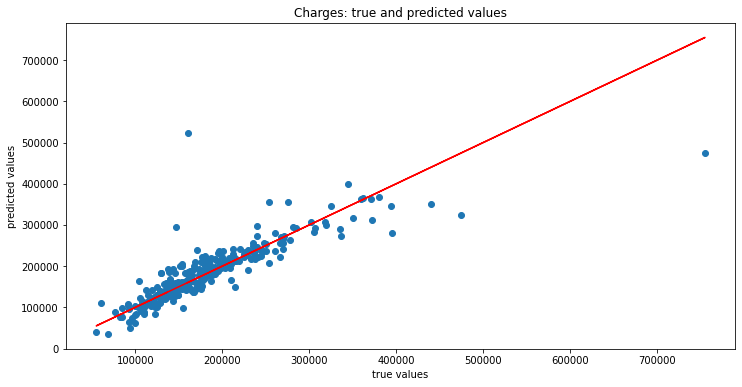

R_squared Score: 0.8253018429707297
Mean Absolute Error: 22334.69221566919
Root Mean Squared Error test: 34733.99149567149
Root Mean Squared Error train: 32796.61395612139
Mean Predicted Selling Price: 178632.0100187796
Mean Selling Price: 179593.79109589042


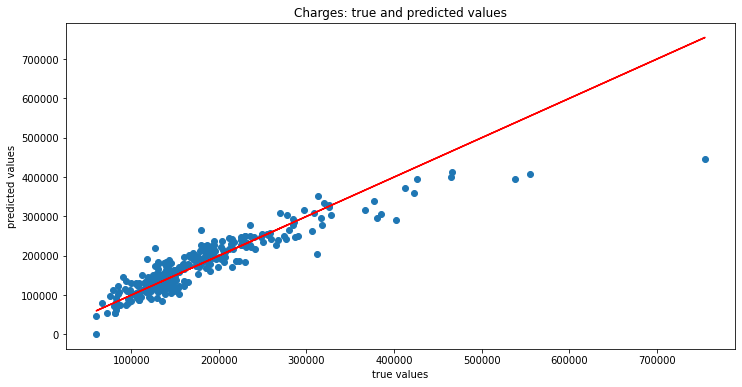

R_squared Score: 0.8452753143801348
Mean Absolute Error: 18921.77911828205
Root Mean Squared Error test: 26657.603884700264
Root Mean Squared Error train: 32622.260700749066
Mean Predicted Selling Price: 180139.6218648116
Mean Selling Price: 177065.5917808219


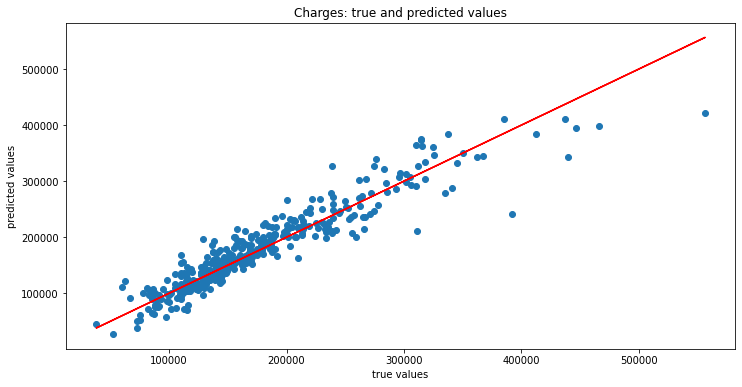

R_squared Score: 0.8514823219422525
Mean Absolute Error: 18420.754953178384
Root Mean Squared Error test: 25322.885034950148
Root Mean Squared Error train: 32173.64283745021
Mean Predicted Selling Price: 176451.99360498507
Mean Selling Price: 174569.5808219178


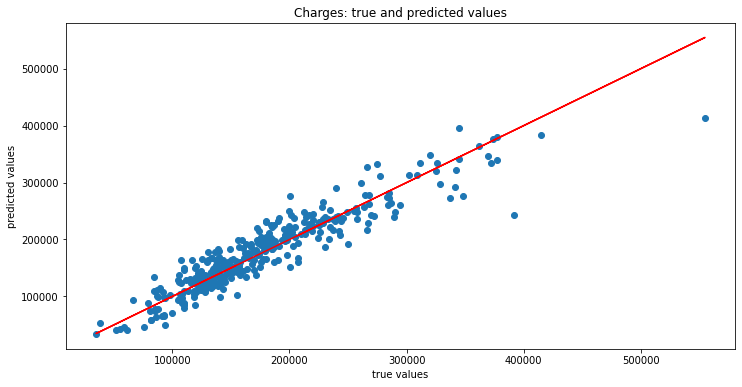

R_squared Score: 0.8261008895057881
Mean Absolute Error: 20192.13216728439
Root Mean Squared Error test: 30394.308971406568
Root Mean Squared Error train: 33976.29410054332
Mean Predicted Selling Price: 185677.23245833933
Mean Selling Price: 188136.59726027396


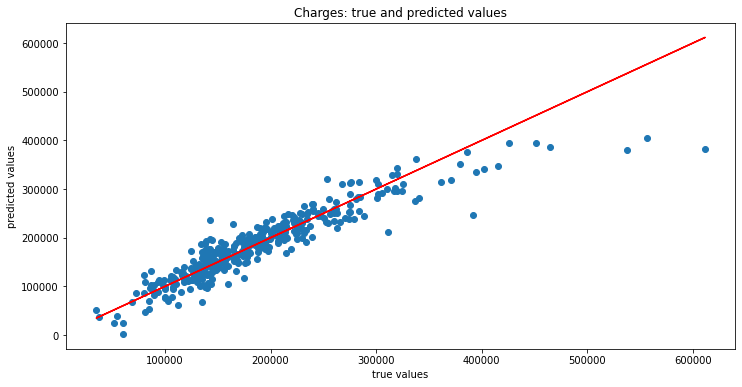

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
lin_reg(X,y)
rfe_reg(X,y)
ridge(X,y,alpha=7)
lasso(X,y, alpha=.05)
elastic(X,y, alpha=0.1, l1_ratio=0.5)

R_squared Score: 0.8266427924561489
Mean Absolute Error: 20681.66926279881
Root Mean Squared Error test: 30650.89787959894
Root Mean Squared Error train: 33642.08208405934
Mean Predicted Selling Price: 180103.7844531701
Mean Selling Price: 182578.97602739726


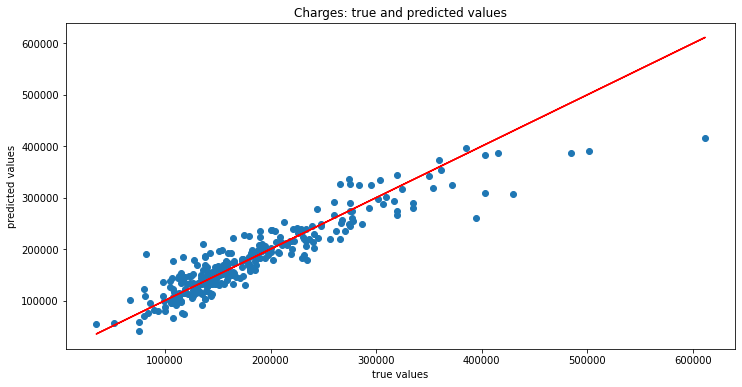

R_squared Score: 0.8054328108707733
Mean Absolute Error: 25475.344725187602
Root Mean Squared Error test: 46928.834799959404
Root Mean Squared Error train: 30033.653203547838
Mean Predicted Selling Price: 183919.31624073934
Mean Selling Price: 185863.29315068494


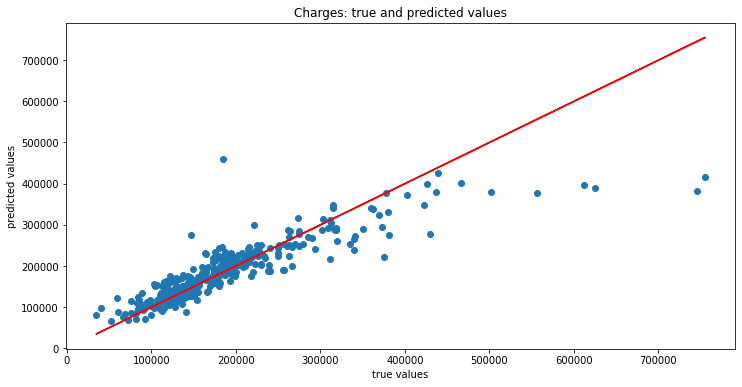

R_squared Score: 0.8260894047409153
Mean Absolute Error: 21063.926622693303
Root Mean Squared Error test: 29903.80992219943
Root Mean Squared Error train: 34122.48320556479
Mean Predicted Selling Price: 185376.5221869548
Mean Selling Price: 182427.09041095892


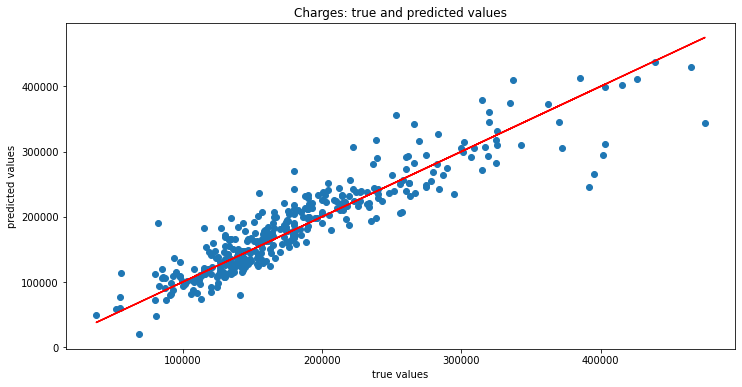

R_squared Score: 0.7574015014244155
Mean Absolute Error: 27006.15757629556
Root Mean Squared Error test: 41365.698314147165
Root Mean Squared Error train: 38336.009049545304
Mean Predicted Selling Price: 180941.26701877618
Mean Selling Price: 177500.0493150685


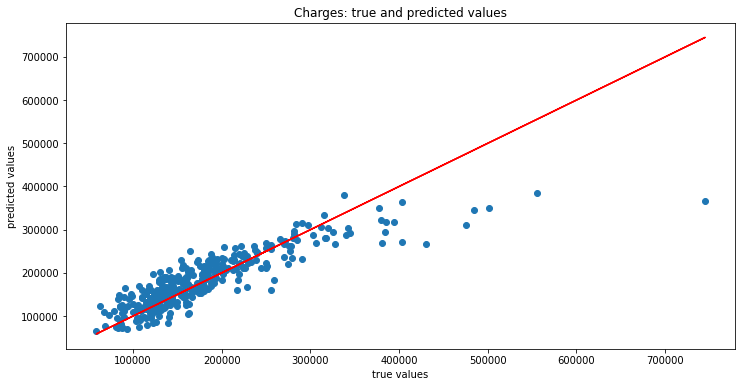

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [0]:
lr = linear_model.LinearRegression() 
#Use RFE to remove not significant features from the initial model.
rfe = RFE(lr, step=1)
rfe = rfe.fit(X, y)
#Test new model
#New features dataframe containing only selected features through RFE
X_rfe = X[X.columns[rfe.support_]]


lin_reg(X_rfe, y)
ridge(X_rfe, y,alpha=7)
lasso(X_rfe, y, alpha=.05)
elastic(X_rfe, y, alpha=0.1, l1_ratio=0.5)

# CV Models

In [0]:
alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

def lin_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    model = linear_model.LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    # print("Best alpha value is: {}".format(model.alpha_))
    print('Linear Regression OLS')
    print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
    print("-----Test set statistics-----")
    print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def rfe_reg(X, y):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    lr = linear_model.LinearRegression()
    model = RFE(lr)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print('R_squared Score:', model.score(X, y))

    #Display errors
    print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
    print('Root Mean Squared Error test:', np.sqrt(mse(y_test, y_pred)))
    print('Root Mean Squared Error train:', np.sqrt(mse(y_train, y_pred_train)))

    #Compare predicted and actual values
    print('Mean Predicted Selling Price:', y_pred.mean())
    print('Mean Selling Price:', y_test.mean())

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def ridgeCV(X, y, alphas, cv):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    model = RidgeCV(alphas=alphas, cv=cv)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print('Ridge CV')
    print("Best alpha value is: {}".format(model.alpha_))
    print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
    print("-----Test set statistics-----")
    print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def lassoCV(X, y, alphas, cv):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    model =  LassoCV(alphas=alphas, cv=cv)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print('Lasso CV')
    print("Best alpha value is: {}".format(model.alpha_))
    print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
    print("-----Test set statistics-----")
    print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

def elasticCV(X, y, alphas, cv):  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

    model = ElasticNetCV(alphas=alphas, cv=cv)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)

    print('Elastic CV')
    print("Best alpha value is: {}".format(model.alpha_))
    print("R-squared of the model in training set is: {}".format(model.score(X_train, y_train)))
    print("-----Test set statistics-----")
    print("R-squared of the model in test set is: {}".format(model.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_pred)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_pred)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_pred)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_pred) / y_test)) * 100))

    plt.scatter(y_test, y_pred)
    plt.plot(y_test, y_test, color="red")
    plt.xlabel("true values")
    plt.ylabel("predicted values")
    plt.title("Charges: true and predicted values")
    plt.show()
    return model

Linear Regression OLS
R-squared of the model in training set is: 0.866039947272853
-----Test set statistics-----
R-squared of the model in test set is: 0.7885269198085659
Mean absolute error of the prediction is: 22517.94933450994
Mean squared error of the prediction is: 1432217223.4687288
Root mean squared error of the prediction is: 37844.64590227696
Mean absolute percentage error of the prediction is: 12.204643106540066


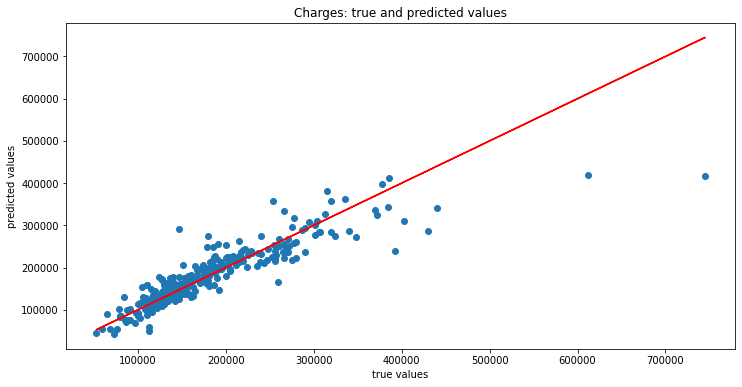

Ridge CV
Best alpha value is: 10.0
R-squared of the model in training set is: 0.8464587166410551
-----Test set statistics-----
R-squared of the model in test set is: 0.8243296140955771
Mean absolute error of the prediction is: 21022.968825711272
Mean squared error of the prediction is: 1282728815.6661751
Root mean squared error of the prediction is: 35815.20369432757
Mean absolute percentage error of the prediction is: 12.14169996282966


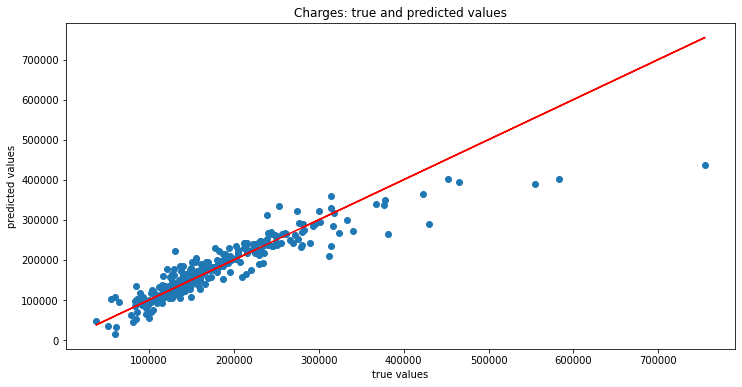

Lasso CV
Best alpha value is: 100.0
R-squared of the model in training set is: 0.8576947048133481
-----Test set statistics-----
R-squared of the model in test set is: 0.8050949240353391
Mean absolute error of the prediction is: 20855.089680712787
Mean squared error of the prediction is: 1524896303.4844303
Root mean squared error of the prediction is: 39049.92065913106
Mean absolute percentage error of the prediction is: 11.441197539510375


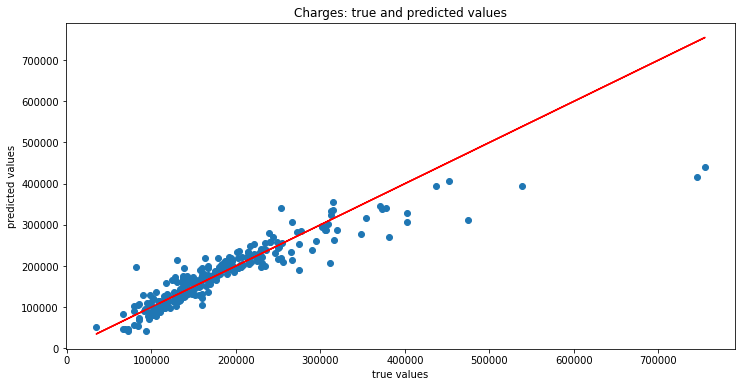

Elastic CV
Best alpha value is: 0.01
R-squared of the model in training set is: 0.8520940185814779
-----Test set statistics-----
R-squared of the model in test set is: 0.8147162698067761
Mean absolute error of the prediction is: 23541.642381440146
Mean squared error of the prediction is: 1484963985.8427308
Root mean squared error of the prediction is: 38535.2304501054
Mean absolute percentage error of the prediction is: 14.012017909309707


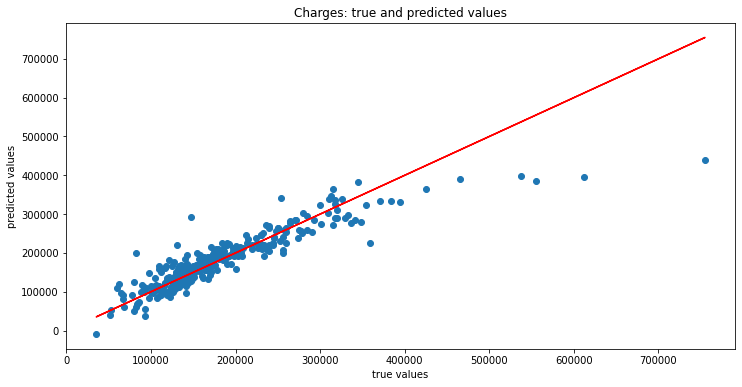

ElasticNetCV(alphas=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                     0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0,
                     1000000.0, 10000000.0, 100000000.0, 1000000000.0,
                     10000000000.0, 100000000000.0, 1000000000000.0,
                     10000000000000.0, 100000000000000.0, 1000000000000000.0,
                     1e+16, 1e+17, 1e+18, 1e+19, ...],
             copy_X=True, cv=5, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [0]:
lin_reg(X, y)
ridgeCV(X, y, alphas, cv=5)
lassoCV(X, y, alphas, cv=5)
elasticCV(X, y, alphas, cv=5)

Based on the overall R-squared value (0.82), MAE (21022), MSE (12e8), RMSE (35815), and MAPE (12.1%), Ridge CV is the best model to predict house prices.

Linear Regression OLS
R-squared of the model in training set is: 0.826638276834873
-----Test set statistics-----
R-squared of the model in test set is: 0.8235235153738655
Mean absolute error of the prediction is: 21229.107111643138
Mean squared error of the prediction is: 1220733993.2943869
Root mean squared error of the prediction is: 34939.00389671101
Mean absolute percentage error of the prediction is: 12.568315189822087


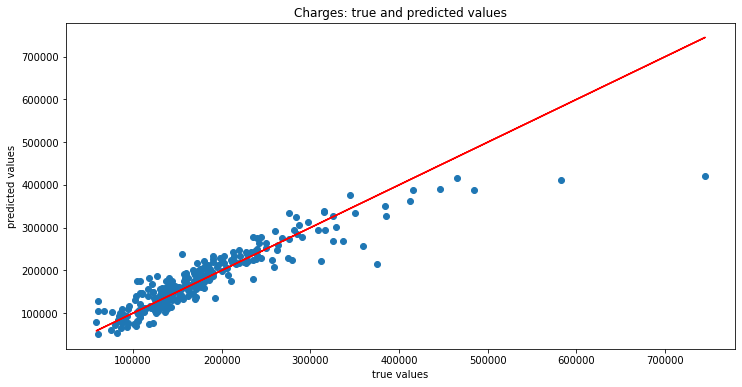

Ridge CV
Best alpha value is: 1.0
R-squared of the model in training set is: 0.8172710720910444
-----Test set statistics-----
R-squared of the model in test set is: 0.8724348110468716
Mean absolute error of the prediction is: 19214.128031702854
Mean squared error of the prediction is: 630962600.6309441
Root mean squared error of the prediction is: 25118.96894044308
Mean absolute percentage error of the prediction is: 12.474585183647513


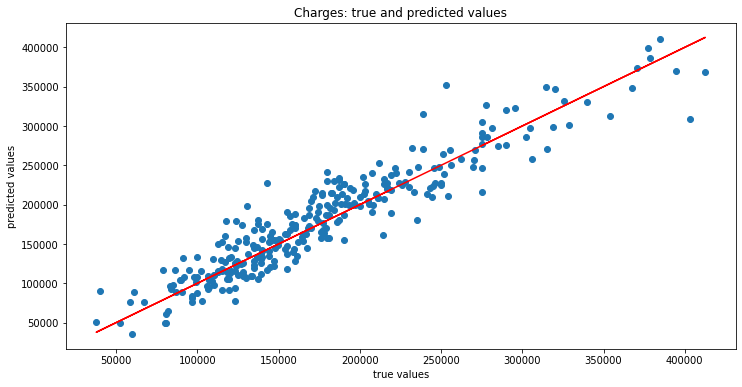

Lasso CV
Best alpha value is: 0.1
R-squared of the model in training set is: 0.8446218650145818
-----Test set statistics-----
R-squared of the model in test set is: 0.7251746313821958
Mean absolute error of the prediction is: 21323.684923914134
Mean squared error of the prediction is: 1505472299.6919174
Root mean squared error of the prediction is: 38800.41623091068
Mean absolute percentage error of the prediction is: 12.932380756218354


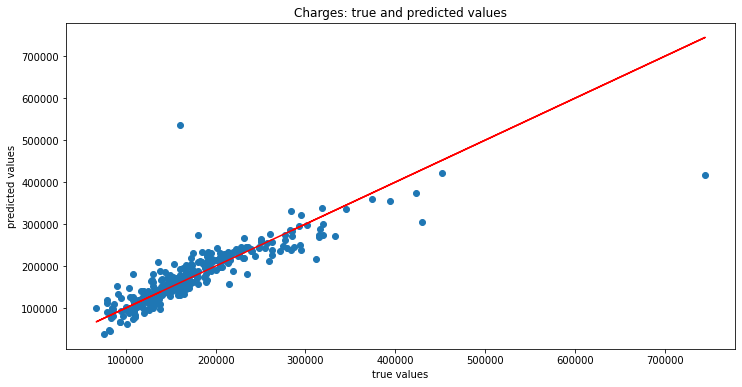

Elastic CV
Best alpha value is: 0.001
R-squared of the model in training set is: 0.8222594876877715
-----Test set statistics-----
R-squared of the model in test set is: 0.8373162306825603
Mean absolute error of the prediction is: 19939.77629329786
Mean squared error of the prediction is: 999216233.9809338
Root mean squared error of the prediction is: 31610.38174367614
Mean absolute percentage error of the prediction is: 12.044328187892633


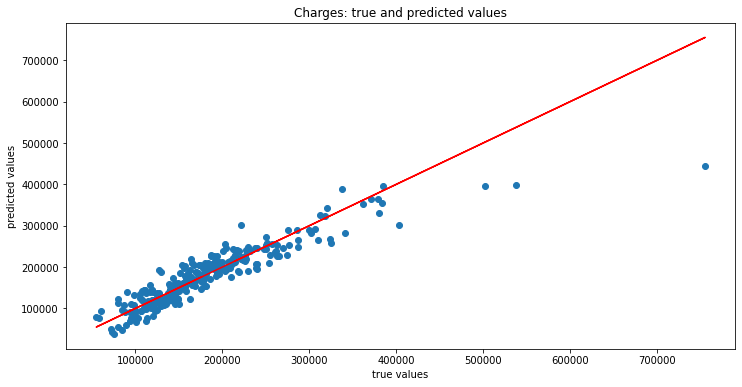

ElasticNetCV(alphas=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                     0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0,
                     1000000.0, 10000000.0, 100000000.0, 1000000000.0,
                     10000000000.0, 100000000000.0, 1000000000000.0,
                     10000000000000.0, 100000000000000.0, 1000000000000000.0,
                     1e+16, 1e+17, 1e+18, 1e+19, ...],
             copy_X=True, cv=5, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [0]:
# using RFE features
lin_reg(X_rfe, y)
ridgeCV(X_rfe, y, alphas, cv=5)
lassoCV(X_rfe, y, alphas, cv=5)
elasticCV(X_rfe, y, alphas, cv=5)

Based on the R-squared value (0.87), MAE (19214), MSE (6e8), RMSE (25118), and MAPE (12.5%), the Elastic CV model is the best model to predict house prices.

Linear Regression OLS
R-squared of the model in training set is: 0.8381868289713561
-----Test set statistics-----
R-squared of the model in test set is: 0.8507810082706853
Mean absolute error of the prediction is: 19769.483540728063
Mean squared error of the prediction is: 1005794444.1080045
Root mean squared error of the prediction is: 31714.262471449725
Mean absolute percentage error of the prediction is: 11.71668087926573


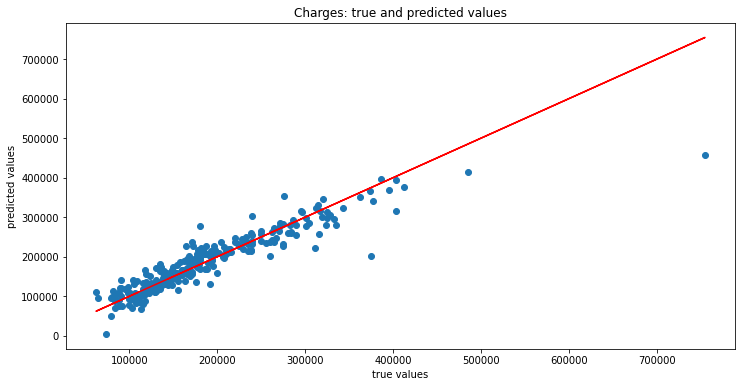

Ridge CV
Best alpha value is: 1.0
R-squared of the model in training set is: 0.8399443849598757
-----Test set statistics-----
R-squared of the model in test set is: 0.8438476832580118
Mean absolute error of the prediction is: 19854.948104846146
Mean squared error of the prediction is: 1285956487.0622973
Root mean squared error of the prediction is: 35860.235457429684
Mean absolute percentage error of the prediction is: 10.663350077364855


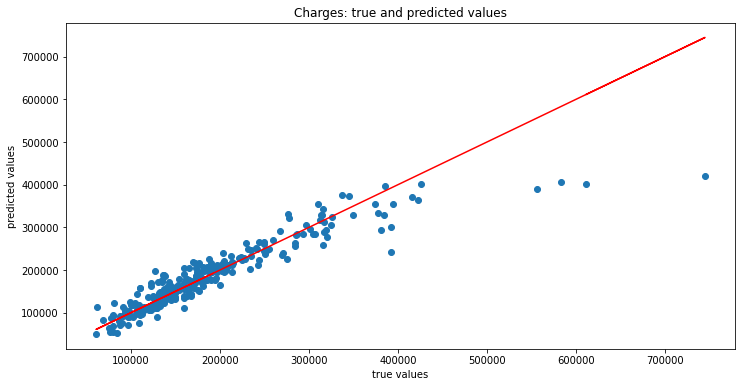

Lasso CV
Best alpha value is: 100.0
R-squared of the model in training set is: 0.8340938096986225
-----Test set statistics-----
R-squared of the model in test set is: 0.8721570326763681
Mean absolute error of the prediction is: 19180.9108122496
Mean squared error of the prediction is: 776267421.1179863
Root mean squared error of the prediction is: 27861.57607024388
Mean absolute percentage error of the prediction is: 12.601411445672262


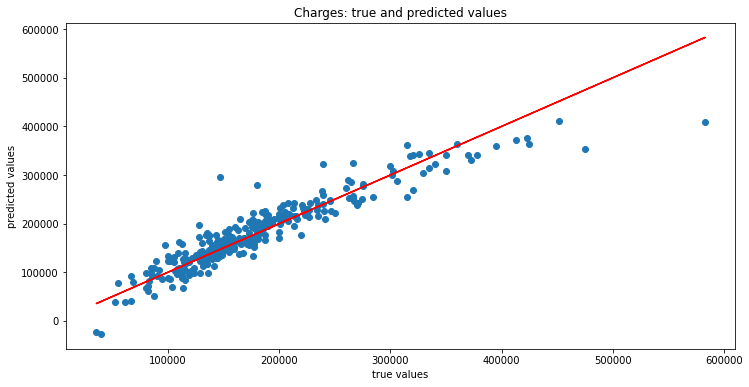

Elastic CV
Best alpha value is: 0.001
R-squared of the model in training set is: 0.837680178390175
-----Test set statistics-----
R-squared of the model in test set is: 0.8648811233930046
Mean absolute error of the prediction is: 18807.76969135657
Mean squared error of the prediction is: 768308091.2097939
Root mean squared error of the prediction is: 27718.37100570295
Mean absolute percentage error of the prediction is: 12.291402629534751


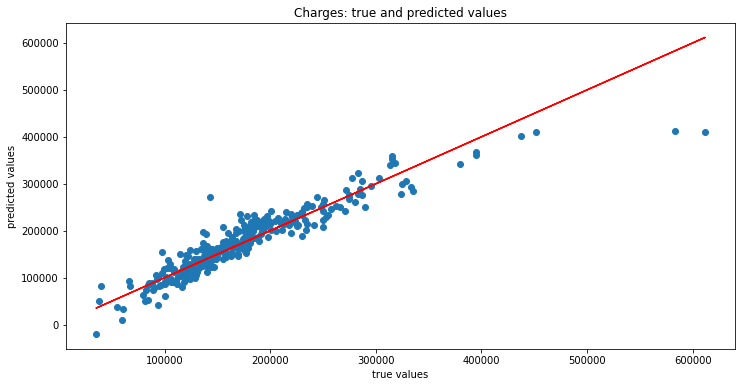

ElasticNetCV(alphas=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                     0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0,
                     1000000.0, 10000000.0, 100000000.0, 1000000000.0,
                     10000000000.0, 100000000000.0, 1000000000000.0,
                     10000000000000.0, 100000000000000.0, 1000000000000000.0,
                     1e+16, 1e+17, 1e+18, 1e+19, ...],
             copy_X=True, cv=5, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [0]:
# using only statistically significant features
lin_reg(X3, y)
ridgeCV(X3, y, alphas, cv=5)
lassoCV(X3, y, alphas, cv=5)
elasticCV(X3, y, alphas, cv=5)

Based on the overall R-squared value (0.87), MAE (19180), MSE (7e8), RMSE (27861), and MAPE (12.6%), Lasso CV is the best model to predict house prices.

Comparing the different method and feature combinations above, the best model is the Elastic CV model using the RFE-selected features i.e. ['overallqual', 'kitchenabvgr', 'grlivarea_transformed', 'mszoning_FV',
       'mszoning_RH', 'mszoning_RL', 'mszoning_RM', 'lotshape_IR2',
       'lotshape_IR3', 'lotconfig_CulDSac', 'lotconfig_FR3', 'bldgtype_Duplex',
       'bldgtype_Twnhs', 'bldgtype_TwnhsE', 'housestyle_1.5Unf',
       'housestyle_1Story', 'housestyle_2.5Unf', 'housestyle_SFoyer',
       'roofstyle_Gable', 'roofstyle_Gambrel', 'roofstyle_Hip',
       'roofstyle_Mansard', 'roofstyle_Shed', 'masvnrtype_BrkFace',
       'masvnrtype_None', 'masvnrtype_Stone', 'exterqual_Fa', 'exterqual_Gd',
       'exterqual_TA', 'bsmtqual_Fa', 'bsmtqual_Gd', 'bsmtqual_TA',
       'bsmtexposure_Gd', 'bsmtexposure_No', 'bsmtfintype1_LwQ',
       'bsmtfintype1_Unf', 'heatingqc_Po', 'kitchenqual_Fa', 'kitchenqual_Gd',
       'kitchenqual_TA', 'garagetype_Basment', 'garagetype_BuiltIn',
       'salecondition_Partial']

# Add interest rate to dataset. 
Data obtained from https://fred.stlouisfed.org/series/INTDSRUSM193N.
Rationale: Ultimately, mortgage rates directly affect real estate prices. Essentially, as interest rates increase, cash flow loses its value, causing real estate prices to rise. (Another way to look at this is the lower the interest rate, the lower the return expectation, making real estate more attractive to investors)

In [0]:
df_ori.yrsold.value_counts()

2009    338
2007    329
2006    314
2008    304
2010    175
Name: yrsold, dtype: int64

In [0]:
from google.colab import files
import io
uploaded = files.upload()

Saving INTDSRUSM193N.csv to INTDSRUSM193N (1).csv


In [0]:
df_IR = pd.read_csv(io.BytesIO(uploaded['INTDSRUSM193N.csv']))
df_IR.rename(columns={'INTDSRUSM193N': 'interest_rate'}, inplace=True)
df_IR.head()

,MONTH,DAY,YEAR,interest_rate
0,1,1,2006,5.50
1,2,1,2006,5.50
2,3,1,2006,5.75
3,4,1,2006,5.75
4,5,1,2006,6.00


In [0]:
X_IR = pd.merge(X, df_IR.drop(columns=['DAY']), left_on=['mosold', 'yrsold'], right_on=['MONTH', 'YEAR'], how='left')
X_IR = X_IR.drop(columns=['MONTH', 'YEAR'])
# X_IR = X_IR[X3.columns.tolist() + ['interest_rate']]
X_IR.head()

,const,mssubclass,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,fullbath,bedroomabvgr,kitchenabvgr,mosold,yrsold,totalbsmtsf_transformed,garagearea_transformed,lotfrontage_transformed,lotarea_transformed,firstflrsf_transformed,grlivarea_transformed,bsmtunfsf_transformed,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,lotshape_IR2,lotshape_IR3,lotshape_Reg,lotconfig_CulDSac,lotconfig_FR2,lotconfig_FR3,lotconfig_Inside,bldgtype_2fmCon,bldgtype_Duplex,bldgtype_Twnhs,bldgtype_TwnhsE,housestyle_1.5Unf,housestyle_1Story,housestyle_2.5Fin,housestyle_2.5Unf,housestyle_2Story,housestyle_SFoyer,housestyle_SLvl,roofstyle_Gable,...,masvnrtype_BrkFace,masvnrtype_None,masvnrtype_Stone,exterqual_Fa,exterqual_Gd,exterqual_TA,foundation_CBlock,foundation_PConc,foundation_Slab,foundation_Stone,foundation_Wood,bsmtqual_Fa,bsmtqual_Gd,bsmtqual_TA,bsmtexposure_Gd,bsmtexposure_Mn,bsmtexposure_No,bsmtfintype1_BLQ,bsmtfintype1_GLQ,bsmtfintype1_LwQ,bsmtfintype1_Rec,bsmtfintype1_Unf,heatingqc_Fa,heatingqc_Gd,heatingqc_Po,heatingqc_TA,kitchenqual_Fa,kitchenqual_Gd,kitchenqual_TA,garagetype_Attchd,garagetype_Basment,garagetype_BuiltIn,garagetype_CarPort,garagetype_Detchd,garagefinish_RFn,garagefinish_Unf,salecondition_AdjLand,salecondition_Alloca,salecondition_Family,salecondition_Normal,salecondition_Partial,interest_rate
0,1.0,60,8450,7,5,2003,2003,2,3,1,2,2008,856,548,65.0,8450,2.932474,3.232996,13,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,3.50
1,1.0,20,9600,6,8,1976,1976,2,3,1,5,2007,1262,460,80.0,9600,3.101059,3.101059,17,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,6.25
2,1.0,60,11250,7,5,2001,2002,2,3,1,9,2008,920,608,68.0,11250,2.963788,3.251881,20,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,2.25
3,1.0,70,9550,7,5,1915,1970,1,3,1,2,2006,756,642,60.0,9550,2.982723,3.234770,22,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,5.50
4,1.0,60,14260,8,5,2000,2000,2,4,1,12,2008,1145,836,84.0,14260,3.058805,3.342028,21,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0.50


Linear Regression OLS
R-squared of the model in training set is: 0.8619155916244158
-----Test set statistics-----
R-squared of the model in test set is: 0.7868469011136221
Mean absolute error of the prediction is: 20209.30135118607
Mean squared error of the prediction is: 1196818974.0086048
Root mean squared error of the prediction is: 34595.07152772783
Mean absolute percentage error of the prediction is: 12.652877039057882


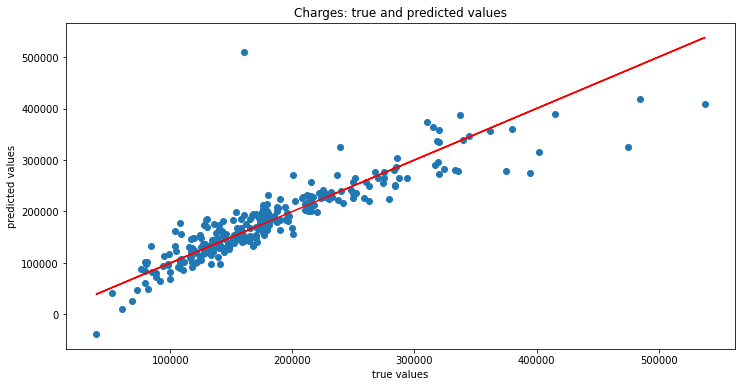

Ridge CV
Best alpha value is: 10.0
R-squared of the model in training set is: 0.8372229573394891
-----Test set statistics-----
R-squared of the model in test set is: 0.8722286938639624
Mean absolute error of the prediction is: 19427.81722646682
Mean squared error of the prediction is: 792110746.9640222
Root mean squared error of the prediction is: 28144.46210116694
Mean absolute percentage error of the prediction is: 11.836712331521504


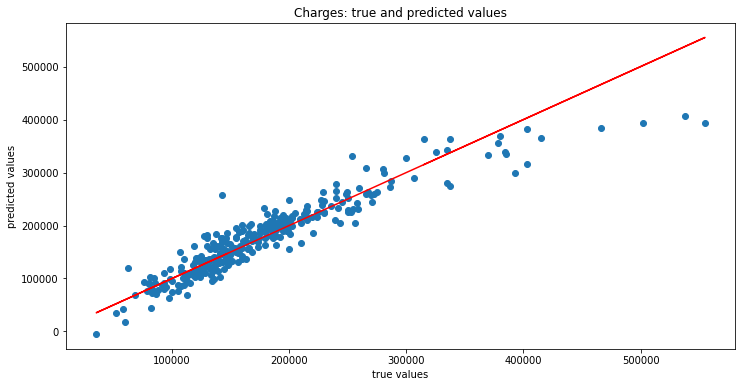

Lasso CV
Best alpha value is: 100.0
R-squared of the model in training set is: 0.8461492185947797
-----Test set statistics-----
R-squared of the model in test set is: 0.8585545546943338
Mean absolute error of the prediction is: 18986.010320256224
Mean squared error of the prediction is: 761671543.0938693
Root mean squared error of the prediction is: 27598.39747329307
Mean absolute percentage error of the prediction is: 12.61528402529937


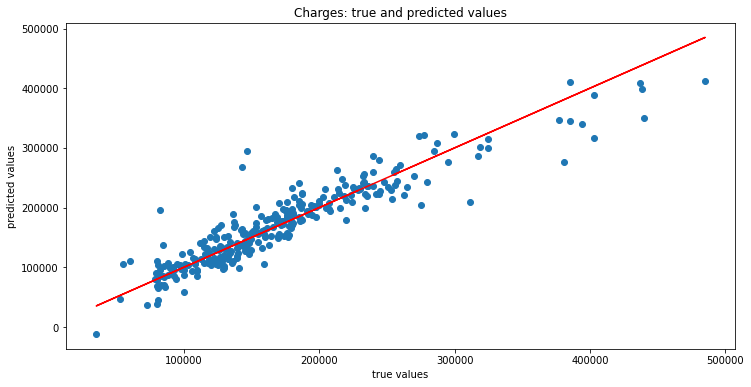

Elastic CV
Best alpha value is: 0.01
R-squared of the model in training set is: 0.8441803550105185
-----Test set statistics-----
R-squared of the model in test set is: 0.8696685589758858
Mean absolute error of the prediction is: 17972.482410734363
Mean squared error of the prediction is: 671970235.463747
Root mean squared error of the prediction is: 25922.38869131753
Mean absolute percentage error of the prediction is: 10.739336066215904


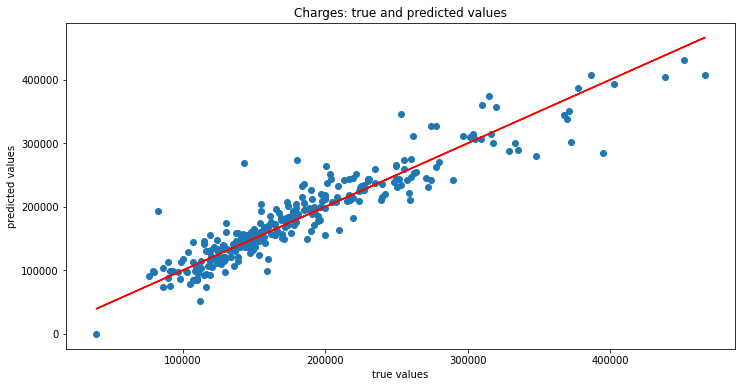

ElasticNetCV(alphas=[1e-10, 1e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001,
                     0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0,
                     1000000.0, 10000000.0, 100000000.0, 1000000000.0,
                     10000000000.0, 100000000000.0, 1000000000000.0,
                     10000000000000.0, 100000000000000.0, 1000000000000000.0,
                     1e+16, 1e+17, 1e+18, 1e+19, ...],
             copy_X=True, cv=10, eps=0.001, fit_intercept=True, l1_ratio=0.5,
             max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
             positive=False, precompute='auto', random_state=None,
             selection='cyclic', tol=0.0001, verbose=0)

In [0]:
lin_reg(X_IR.drop(columns=['interest_rate']), y)
ridgeCV(X_IR, y, alphas, cv=10)
lassoCV(X_IR, y, alphas, cv=10)
elasticCV(X_IR, y, alphas, cv=10)

Based on the overall statistics, the Ridge CV model is the best model to predict house prices when interest rates is added as a variable.